Introduction
============

The dataset contains information about students of a Portuguese university, from
various fields, known at the time of their enrollment, and their academic
performance at the end of the first and second semester. The goal is to identify
students at risk of dropping out, at an early stage of their academic path so
that strategies to support them can be put into place. It is a classification
problem where each student is assigned to one of three categories:

1. _Dropout_ (32%),
2. _Enrolled_ (18%),
3. or _Graduate_ (50%).

Source of the data: [10.24432/C5MC89](https://doi.org/10.24432/C5MC89)
([alternate URL](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)).

Research questions
------------------

1. What kinds of models can identify most of the _Dropout_ class with sufficiently
   low number of false positives?

   Models to be tested (with appropriate boosting, regularization, and
   hyperparameter-optimization techniques):

    * k-Nearest Neighbors
    * Logistic Regression
    * Support Vector Machines
    * Decision trees (in combination with the above), random forests

   Since the goal is to identify a risk, the target metric must focus on
   precision and recall, e.g. F1.

   For comparison, a random-guess model will also be included.

   The problem can be formulated in multiple ways, some of them may give better
   results than the others:

    * dropout vs. non-dropout,
    * dropout, enrolled, graduate,
    * graduate vs. non-graduate.

   Note that each of these formulations brings in a different factor of
   imbalance in the data, which might cause problems with naive k-fold
   cross-validation if the distribution of the classes are too different
   between the train and test set (e.g. insufficient number of minority
   class elements in the training or test set). A technique called
   [stratified k-fold cross-validation](https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/)
   might help with this.

3. What factors can indicate an increased risk of dropout early on? What
   features will the most successful models end up using?

4. Are all dropout outcomes the same?

   Are there any subclasses that might be easier to predict (or prevent) than
   others? Can any patterns or differences be identified between the
   misclassified and the correctly classified samples?

EDA highlights
--------------

### Dropout early signs

Some early signs that may be associated with a higher chance of dropping out
are identifyable by taking a look at the data.

#### Marriage
  
| Marital status ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) single                  |            1184  |             720  |            2015  |            3919  |
| (2) married                 |             179  |              52  |             148  |             379  |
| (3) widower                 |               1  |               2  |               1  |               4  |
| (4) divorced                |              42  |              16  |              33  |              91  |
| (5) facto union             |              11  |               3  |              11  |              25  |
| (6) legally separated       |               4  |               1  |               1  |               6  |


#### Older age at enrollment

Correlation with the marital status: 0.52.
  
| Age at enrollment                |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    17.000 |    70.000 |    23.265 |     7.588 |     2.055 |     4.127 |
| Dropout                          |    18.000 |    70.000 |    26.069 |     8.704 |     1.358 |     1.521 |
| Enrolled                         |    17.000 |    54.000 |    22.369 |     6.303 |     2.323 |     5.465 |
| Graduate                         |    17.000 |    62.000 |    21.784 |     6.693 |     2.774 |     8.030 |
  
 #### Already having a degree

| Application mode ↓ / Target →                 |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) 1st phase - general contingent            |              345 |              300 |             1063 |             1708 |
| (2) Ordinance No. 612/93                      |                2 |                0 |                1 |                3 |
| (5) 1st phase - speci...ngent (Azores Island) |                2 |                8 |                6 |               16 |
| **(7) Holders of other higher courses**       |           **85** |            **7** |           **47** |          **139** |
| (10) Ordinance No. 854-B/99                   |                3 |                0 |                7 |               10 |
| (15) International student (bachelor)         |                5 |               10 |               15 |               30 |
| (16) 1st phase - spec...gent (Madeira Island) |                5 |                8 |               25 |               38 |
| (17) 2nd phase - general contingent           |              256 |              159 |              457 |              872 |
| (18) 3rd phase - general contingent           |               45 |               16 |               63 |              124 |
| (26) Ordinance No. 53... b2) (Different Plan) |                1 |                0 |                0 |                1 |
| (27) Ordinance No. 53...3 (Other Institution) |                1 |                0 |                0 |                1 |
| **(39) Over 23 years old**                    |          **435** |          **121** |          **229** |          **785** |
| (42) Transfer                                 |               34 |               11 |               32 |               77 |
| (43) Change of course                         |              115 |               75 |              122 |              312 |
| (44) Technological sp...ation diploma holders |               63 |               56 |               94 |              213 |
| (51) Change of institution/course             |               20 |               13 |               26 |               59 |
| (53) Short cycle diploma holders              |                4 |               10 |               21 |               35 |
| (57) Change of instit...ourse (International) |                0 |                0 |                1 |                1 |

| Previous qualification ↓ / Target →           |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary education                       |             1078 |              698 |             1941 |             3717 |
| (2) Higher education - bachelor's degree      |               16 |                1 |                6 |               23 |
| (3) Higher education - degree                 |               75 |                4 |               47 |              126 |
| (4) Higher education - master's               |                4 |                1 |                3 |                8 |
| (5) Higher education - doctorate              |                1 |                0 |                0 |                1 |
| (6) Frequency of higher education             |                7 |                1 |                8 |               16 |
| (9) 12th year of schooling - not completed    |               11 |                0 |                0 |               11 |
| (10) 11th year of schooling - not completed   |                3 |                0 |                1 |                4 |
| (12) Other - 11th year of schooling           |               26 |                6 |               13 |               45 |
| (14) 10th year of schooling                   |                1 |                0 |                0 |                1 |
| (15) 10th year of schooling - not completed   |                1 |                0 |                1 |                2 |
| (19) Basic education .../11th year) or equiv. |              104 |               13 |               45 |              162 |
| (38) Basic education ...h/8th year) or equiv. |                3 |                1 |                3 |                7 |
| (39) Technological specialization course      |               69 |               55 |               95 |              219 |
| (40) Higher education - degree (1st cycle)    |               14 |                6 |               20 |               40 |
| (42) Professional higher technical course     |                6 |                8 |               22 |               36 |
| (43) Higher education - master (2nd cycle)    |                2 |                0 |                4 |                6 |

#### Being in debt

| Debtor ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no              |             1109 |              704 |             2108 |             3921 |
| (1) yes             |              312 |               90 |              101 |              503 |

#### Being behind with one's tuition fees

| Tuition fees up to date ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------------ | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                               |              457 |               42 |               29 |              528 |
| (1) yes                              |              964 |              752 |             2180 |             3896 |

#### Not holding a scholarship

| Scholarship holder ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                          |             1287 |              664 |             1374 |             3325 |
| (1) yes                         |              134 |              130 |              835 |             1099 |

#### Having low grades or not even trying

Note: [Portuguese high-schools and universities use a 20-point grading system](https://en.wikipedia.org/wiki/Academic_grading_in_Portugal).

| Curricular units 1st sem (grade) |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    18.875 |    10.641 |     4.844 |    -1.568 |     0.908 |
| Dropout                          |     0.000 |    18.000 |     7.257 |     6.031 |    -0.309 |    -1.768 |
| Enrolled                         |     0.000 |    17.000 |    11.125 |     3.675 |    -2.361 |     4.682 |
| Graduate                         |     0.000 |    18.875 |    12.644 |     2.699 |    -3.450 |    14.028 |

| Curricular units 2nd sem (grade) |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    18.571 |    10.230 |     5.211 |    -1.314 |     0.067 |
| Dropout                          |     0.000 |    17.714 |     5.899 |     6.119 |     0.127 |    -1.871 |
| Enrolled                         |     0.000 |    17.600 |    11.117 |     3.601 |    -2.393 |     4.967 |
| Graduate                         |     0.000 |    18.571 |    12.697 |     2.686 |    -3.448 |    14.212 |

#### Course selection

Dropout rates vary between courses. (But this is not the end of the story, see below.)

| Course ↓ / Target →                         |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (33) Biofuel Production Technologies        |                8 |                3 |                1 |               12 |
| (171) Animation and Multimedia Design       |               82 |               37 |               96 |              215 |
| (8014) Social Service (evening attendance)  |               71 |               21 |              123 |              215 |
| (9003) Agronomy                             |               86 |               37 |               87 |              210 |
| (9070) Communication Design                 |               51 |               42 |              133 |              226 |
|   (9085) Veterinary Nursing                 |               90 |              75* |              172 |              337 |
| (9119) Informatics Engineering              |               92 |               64 |               14 |              170 |
| (9130) Equinculture                         |               78 |               21 |               42 |              141 |
| (9147) Management                           |              134 |              108 |              138 |              380 |
| (9238) Social Service                       |               65 |               42 |              248 |              355 |
| (9254) Tourism                              |               96 |               41 |              115 |              252 |
| **(9500) Nursing**                          |          **118** |          **100** |          **548** |          **766** |
| (9556) Oral Hygiene                         |               33 |               17 |               36 |               86 |
| (9670) Advertising and Marketing Management |               95 |               48 |              125 |              268 |
| (9773) Journalism and Communication         |              101 |               34 |              196 |              331 |
| (9853) Basic Education                      |               85 |               50 |               57 |              192 |
| **(9991) Management (evening attendance)**  |          **136** |           **54** |           **78** |          **268** |

#### Being male

At first glance, the _Dropout_ column seems to suggest the opposite, but even
though there are slightly more female students in the _Dropout_ category than
males, only 25% dropped out among all the female students, while among the male
students, the ratio was around 45%.

| Gender ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) female          |              720 |              487 |             1661 |             2868 |
| (1) male            |              701 |              307 |              548 |             1556 |

One way gender might affect the performance is via differences in popularity
of the courses among genders, but it is still unclear whether the reason would
be that:

1. male students would tend to chose more difficult courses,
2. or whether they would be less likely to put in the necessary effort, making
   some courses appear more difficult than they actually are.

In the first case, it would be reasonable to expect similar dropout ratios for
both genders, while a higher dropout ratio among male students would support the
second case.

| Course ↓ / Target →                         |  F Dropout | F Gr or En |  M Dropout | M Gr or En |      Total |
| ------------------------------------------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| (33) Biofuel Production Technologies        |          1 |          2 |          7 |          2 |         12 |
| (171) Animation and Multimedia Design       |         36 |         62 |         46 |         71 |        215 |
| (8014) Social Service (evening attendance)  |         54 |        119 |         17 |         25 |        215 |
| (9003) Agronomy                             |         17 |         44 |         69 |         80 |        210 |
| (9070) Communication Design                 |         22 |        108 |         29 |         67 |        226 |
| (9085) Veterinary Nursing                   |         59 |        218 |         31 |         29 |        337 |
| (9119) Informatics Engineering              |          6 |          1 |         86 |         77 |        170 |
| (9130) Equinculture                         |         38 |         41 |         40 |         22 |        141 |
| (9147) Management                           |         54 |        164 |         80 |         82 |        380 |
| (9238) Social Service                       |         43 |        266 |         22 |         24 |        355 |
| (9254) Tourism                              |         52 |        100 |         44 |         56 |        252 |
| **(9500) Nursing**                          |     **81** |    **536** |     **37** |    **112** |    **766** |
| (9556) Oral Hygiene                         |         21 |         46 |         12 |          7 |         86 |
| (9670) Advertising and Marketing Management |         41 |        105 |         54 |         68 |        268 |
| (9773) Journalism and Communication         |         60 |        156 |         41 |         74 |        331 |
| (9853) Basic Education                      |         81 |        102 |          4 |          5 |        192 |
| **(9991) Management (evening attendance)**  |     **54** |     **78** |     **82** |     **54** |    **268** |
| Total                                       |        720 |       2148 |        701 |        855 |       4424 |

Apparently, the dropout ratio of male students is higher in almost all courses
than that of female students, even in the seemingly less difficult ones.

### Variables with limited usefulness

#### `Nacionality`, `International`

Though there are multiple variables dealing with the nationality of students,
and cultural and language related problems might play a role in one's academic
performance, due to the low number of international students (2.5%) and the
lack of any visible pattern between the target classes, this feature doesn't
seem to very useful.

#### Econometrics

Though it would be reasonable to expect influence on the outcomes by the provided
econometric variables (`Unemployment rate`, `Inflation rate`, and `GDP`),
unfortunately, they don't seem to vary a lot between the target categories, and
their interpretation is unclear as well:

 * Do they belong to the students' home country or Portugal?
 * Are they from the beginning of the semester or the end?
 * Were they in a positive or a negative trend?

EDA, initialization
===================

Imports
-------

In [28]:
import collections as cl
import pprint
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display as ipython_display

Utilities
---------

In [49]:
def println(*args, **kwargs):
    print(*args, **kwargs)
    print("")


def pprintln(title, *args, **kwargs):
    print(f"{title}:")
    kwargs.setdefault("indent", 2)
    pprint.pp(*args, **kwargs)
    print("")


plot_layout = (1, 1)
next_subplot = 0


def plt_layout(rows, cols, figsize):
    global plot_layout, next_subplot
    
    plot_layout = (rows, cols)
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    fig.tight_layout()
    next_subplot = 0
    
    return fig


def plt_next(title):
    global plot_layout, next_subplot
    
    next_subplot += 1
    ax = plt.subplot(plot_layout[0], plot_layout[1], next_subplot)
    plt.title(title)

    return ax


def plt_hist(title, *args, **kwargs):
    plt_next(title)
    
    return plt.hist(*args, **kwargs)


def plt_scatter(t1, t2, d1, d2, *args, **kwargs):
    ax = plt_next(f"{t1} vs. {t2}")
    ax.set_xlabel(t1)
    ax.set_ylabel(t2)
    
    return plt.scatter(d1, d2, *args, **kwargs)


def plt_show():
    plt.show()
    next_subplot = 0


def renumber(data, col, cat_descrs):
    print(f"Renumbering {str(col)!r}")

    mapping = invert_dict(dict(enumerate(sorted(data[col].unique()))))
    new_descrs = {
        new_key: cat_descrs.get(old_key, "")
        for old_key, new_key in mapping.items()
    }
    replace_dict_contents(cat_descrs, new_descrs)
    
    return data[col].apply(lambda v: mapping[v])


def invert_dict(dct):
    return dict((value, idx) for idx, value in dct.items())


def replace_dict_contents(old_dict, new_dict):
    old_keys = list(old_dict.keys())
    
    for k in old_keys:
        old_dict.pop(k)

    for k, v in new_dict.items():
        old_dict[k] = v


def gen_histograms_and_tables(data, columns, target, targets):
    target_vals = sorted(data[target].unique())
    need_complement = len(target_vals) > 2
    cols = len(target_vals)
    rows = 2 if need_complement else 1
    plot_height = rows * 3
    colors = [
        (0.9, 0.0, 0.0),
        (0.9, 0.7, 0.0),
        (0.0, 0.8, 0.1),
        (0.9, 0.2, 0.9),
    ]
    colors = {
        tv: color
        for tv, color in zip(target_vals, colors)
    }
    background_color = "lightgrey"
    all_color = "darkblue"
    data_grouped = {
        tv: data[data[target] == tv] for tv in target_vals
    }
    data_grouped_inv = {
        tv: data[data[target] != tv] for tv in target_vals
    }

    for col in columns:
        if col in targets:
            continue

        print(f"===== {col} =====")

        descr = features[col][0]

        if descr:
            print(descr)

        cat_descrs = features[col][1]
        unique_vals = sorted(data[col].unique())
        hist_kwargs = {
            "bins": min(20, len(unique_vals)),
            "range": (data[col].min(), data[col].max()),
        }
        crosstab = {}
        header = [f"{col} ↓ / Target →"]
        with_crosstab = (
            cat_descrs
            or (
                col not in economics
                and (not col.startswith("Curricular units"))
                and len(unique_vals) < 15)
        )

        if cat_descrs:
            hist_kwargs["bins"] = len(unique_vals)

        if with_crosstab:
            crosstab = {v: [] for v in unique_vals}

        plt_layout(rows, cols, (12, plot_height)).set_facecolor(background_color)

        for tv in target_vals:
            plt_next(f"{tv} vs. all").set_facecolor(background_color)
            plt.hist(data[col], label="all", color=all_color, **hist_kwargs)
            plt.hist(
                data_grouped[tv][col],
                label=tv,
                color=colors.get(tv, "black"),
                **hist_kwargs,
            )
            plt.legend()

            if with_crosstab:
                header.append(tv)
                add_to_crosstab(data_grouped[tv][col], unique_vals, crosstab)

        if need_complement:
            for tv in target_vals:
                plt_next(f"not {tv} vs. all").set_facecolor(background_color)
                plt.hist(data[col], label="all", color=all_color, **hist_kwargs)
                plt.hist(
                    data_grouped_inv[tv][col],
                    label=tv,
                    color=colors.get(tv, "black"),
                    **hist_kwargs,
                )
                plt.legend()

        plt_show()

        if with_crosstab:
            header.append("Total")
            add_to_crosstab(data[col], unique_vals, crosstab)
            print_crosstab(header, crosstab, features, col)
        else:
            print_stats(data, col, target_vals, data_grouped)

        print("")


def add_to_crosstab(values, unique_vals, crosstab):
    dist = dict(cl.Counter(values))
    perc_scale = 100.0 / len(values)

    for k in unique_vals:
        count = dist.get(k, 0)
        perc = count * perc_scale
        crosstab[k].append((count, perc))


def print_crosstab(header, crosstab, features, col):
    width_0 = max(
        len(features[col][1].get(k, str(k))) for k in crosstab.keys()
    )
    width_0 = min(45, max(width_0, len(header[0])))
    width = 16

    print(
        f"| {truncate_feature_name(header[0], width_0):{width_0}} | "
        + " | ".join(f"{c:>{width}}" for c in header[1:])
        + " |"
    )
    print(
        f"| {'-' * width_0} | "
        + " | ".join("-" * width for c in header[1:])
        + " |"
    )

    for key, row in crosstab.items():
        print(
            f"| {truncate_feature_name(features[col][1].get(key, str(key)), width_0):{width_0}} | "
            + " | ".join(f"{cnt:>{width}}" for cnt, prc in row)
            + " |"
        )


def truncate_feature_name(text, max_len):
    if len(text) <= max_len:
        return text

    text = text.replace("Curricular units", "C. u.")

    if len(text) <= max_len:
        return text

    keep = (max_len - 3) // 2

    return text[:keep] + "..." + text[-keep:]


def print_stats(data, col, target_vals, data_grouped):
    width = 9
    width_0 = 32
    table = [
        [truncate_feature_name(col, width_0), "Min", "Max", "Mean", "Var", "Skewness", "Kurtosis"],
        ["-" * width_0] + ["-" * width] * 6,
    ]

    for t, d in [("All", data[col])] + [(tv, data_grouped[tv][col]) for tv in target_vals]:
        table.append(
            [t, d.min(), d.max(), d.mean(), d.var() ** 0.5, d.skew(), d.kurt()]
        )

    for row in table:
        print(
            "| "
            + " | ".join(
                format_stat_cell(i, c, width_0 if i == 0 else width)
                for i, c in enumerate(row)
            )
            + " |"
        )


def format_stat_cell(i, c, width):
    if isinstance(c, str):
        return f"{c:{width}}" if i == 0 else f"{c:>{width}}"

    return f"{c:{width}.3f}" if i == 0 else f"{c:>{width}.3f}"


def _test_assign_numbers():
    df = pd.DataFrame([[1, 2, 3], [10, 20, 30], [1, 200, 300]], columns=list("abc"))
    dsc = {1: "one", 10: "ten"}
    a = list(renumber(df, "a", dsc))
    assert (a == [0, 1, 0]) or (a == [1, 0, 1])
    assert (dsc == {0: "one", 1: "ten"}) or (dsc == {0: "ten", 1: "one"})


# _test_assign_numbers()

Features
--------

In [50]:
# {
#     "feature 1": ["description", {
#         100: "(orig id) category 1",
#         123: "(orig id) category 2",
#         ...
#     }],
#     ...
# }
features = {
    'Marital status': ['', {
        1:      '(1) single',
        2:      '(2) married',
        3:      '(3) widower',
        4:      '(4) divorced',
        5:      '(5) facto union',
        6:      '(6) legally separated',
    }],

    'Application mode': ['', {
        1:      '(1) 1st phase - general contingent',
        2:      '(2) Ordinance No. 612/93',
        5:      '(5) 1st phase - special contingent (Azores Island)',
        7:      '(7) Holders of other higher courses',
        10:     '(10) Ordinance No. 854-B/99',
        15:     '(15) International student (bachelor)',
        16:     '(16) 1st phase - special contingent (Madeira Island)',
        17:     '(17) 2nd phase - general contingent',
        18:     '(18) 3rd phase - general contingent',
        26:     '(26) Ordinance No. 533-A/99, item b2) (Different Plan)',
        27:     '(27) Ordinance No. 533-A/99, item b3 (Other Institution)',
        39:     '(39) Over 23 years old',
        42:     '(42) Transfer',
        43:     '(43) Change of course',
        44:     '(44) Technological specialization diploma holders',
        51:     '(51) Change of institution/course',
        53:     '(53) Short cycle diploma holders',
        57:     '(57) Change of institution/course (International)',
    }],

    'Application order': ['Application order (between 0 - first choice; and 9 last choice)', {}],

    'Course': ['', {
        33:     '(33) Biofuel Production Technologies',
        171:    '(171) Animation and Multimedia Design',
        8014:   '(8014) Social Service (evening attendance)',
        9003:   '(9003) Agronomy',
        9070:   '(9070) Communication Design',
        9085:   '(9085) Veterinary Nursing',
        9119:   '(9119) Informatics Engineering',
        9130:   '(9130) Equinculture',
        9147:   '(9147) Management',
        9238:   '(9238) Social Service',
        9254:   '(9254) Tourism',
        9500:   '(9500) Nursing',
        9556:   '(9556) Oral Hygiene',
        9670:   '(9670) Advertising and Marketing Management',
        9773:   '(9773) Journalism and Communication',
        9853:   '(9853) Basic Education',
        9991:   '(9991) Management (evening attendance)',
    }],

    'Daytime/evening attendance': ['', {
        0:      '(0) evening',
        1:      '(1) daytime',
    }],

    'Previous qualification': ['(Education Level)', {
        1:      '(1) Secondary education',
        2:      "(2) Higher education - bachelor's degree",
        3:      '(3) Higher education - degree',
        4:      "(4) Higher education - master's",
        5:      '(5) Higher education - doctorate',
        6:      '(6) Frequency of higher education',
        9:      '(9) 12th year of schooling - not completed',
        10:     '(10) 11th year of schooling - not completed',
        12:     '(12) Other - 11th year of schooling',
        14:     '(14) 10th year of schooling',
        15:     '(15) 10th year of schooling - not completed',
        19:     '(19) Basic education 3rd cycle (9th/10th/11th year) or equiv.',
        38:     '(38) Basic education 2nd cycle (6th/7th/8th year) or equiv.',
        39:     '(39) Technological specialization course',
        40:     '(40) Higher education - degree (1st cycle)',
        42:     '(42) Professional higher technical course',
        43:     '(43) Higher education - master (2nd cycle)',
    }],

    'Previous qualification (grade)': ['Grade of previous qualification (between 0 and 200)', {}],

    'Nacionality': ['(Nationality)', {
        1:      '(1) Portuguese',
        2:      '(2) German',
        6:      '(6) Spanish',
        11:     '(11) Italian',
        13:     '(13) Dutch',
        14:     '(14) English',
        17:     '(17) Lithuanian',
        21:     '(21) Angolan',
        22:     '(22) Cape Verdean',
        24:     '(24) Guinean',
        25:     '(25) Mozambican',
        26:     '(26) Santomean',
        32:     '(32) Turkish',
        41:     '(41) Brazilian',
        62:     '(62) Romanian',
        100:    '(100) Moldova (Republic of)',
        101:    '(101) Mexican',
        103:    '(103) Ukrainian',
        105:    '(105) Russian',
        108:    '(108) Cuban',
        109:    '(109) Colombian',
    }],

    "Mother's qualification": ['(Education Level)', {
        1:      '(1) Secondary Education - 12th Year of Schooling or Eq.',
        2:      "(2) Higher Education - Bachelor's Degree",
        3:      '(3) Higher Education - Degree',
        4:      "(4) Higher Education - Master's",
        5:      '(5) Higher Education - Doctorate',
        6:      '(6) Frequency of Higher Education',
        9:      '(9) 12th Year of Schooling - Not Completed',
        10:     '(10) 11th Year of Schooling - Not Completed',
        11:     '(11) 7th Year (Old)',
        12:     '(12) Other - 11th Year of Schooling',
        14:     '(14) 10th Year of Schooling',
        18:     '(18) General commerce course',
        19:     '(19) Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22:     '(22) Technical-professional course',
        26:     '(26) 7th year of schooling',
        27:     '(27) 2nd cycle of the general high school course',
        29:     '(29) 9th Year of Schooling - Not Completed',
        30:     '(30) 8th year of schooling',
        34:     '(34) Unknown',
        35:     "(35) Can't read or write",
        36:     '(36) Can read without having a 4th year of schooling',
        37:     '(37) Basic education 1st cycle (4th/5th year) or equiv.',
        38:     '(38) Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39:     '(39) Technological specialization course',
        40:     '(40) Higher education - degree (1st cycle)',
        41:     '(41) Specialized higher studies course',
        42:     '(42) Professional higher technical course',
        43:     '(43) Higher Education - Master (2nd cycle)',
        44:     '(44) Higher Education - Doctorate (3rd cycle)',
    }],

    "Father's qualification": ['(Education Level)', {
        1:      '(1) Secondary Education - 12th Year of Schooling or Eq.',
        2:      "(2) Higher Education - Bachelor's Degree",
        3:      '(3) Higher Education - Degree',
        4:      "(4) Higher Education - Master's",
        5:      '(5) Higher Education - Doctorate',
        6:      '(6) Frequency of Higher Education',
        9:      '(9) 12th Year of Schooling - Not Completed',
        10:     '(10) 11th Year of Schooling - Not Completed',
        11:     '(11) 7th Year (Old)',
        12:     '(12) Other - 11th Year of Schooling',
        13:     '(13) 2nd year complementary high school course',
        14:     '(14) 10th Year of Schooling',
        18:     '(18) General commerce course',
        19:     '(19) Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20:     '(20) Complementary High School Course',
        22:     '(22) Technical-professional course',
        25:     '(25) Complementary High School Course - not concluded',
        26:     '(26) 7th year of schooling',
        27:     '(27) 2nd cycle of the general high school course',
        29:     '(29) 9th Year of Schooling - Not Completed',
        30:     '(30) 8th year of schooling',
        31:     '(31) General Course of Administration and Commerce',
        33:     '(33) Supplementary Accounting and Administration',
        34:     '(34) Unknown',
        35:     "(35) Can't read or write",
        36:     '(36) Can read without having a 4th year of schooling',
        37:     '(37) Basic education 1st cycle (4th/5th year) or equiv.',
        38:     '(38) Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39:     '(39) Technological specialization course',
        40:     '(40) Higher education - degree (1st cycle)',
        41:     '(41) Specialized higher studies course',
        42:     '(42) Professional higher technical course',
        43:     '(43) Higher Education - Master (2nd cycle)',
        44:     '(44) Higher Education - Doctorate (3rd cycle)',
    }],

    "Mother's occupation": ['(Occupation)', {
        0:      '(0) Student',
        1:      '(1) Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2:      '(2) Specialists in Intellectual and Scientific Activities',
        3:      '(3) Intermediate Level Technicians and Professions',
        4:      '(4) Administrative staff',
        5:      '(5) Personal Services, Security and Safety Workers and Sellers',
        6:      '(6) Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7:      '(7) Skilled Workers in Industry, Construction and Craftsmen',
        8:      '(8) Installation and Machine Operators and Assembly Workers',
        9:      '(9) Unskilled Workers',
        10:     '(10) Armed Forces Professions',
        90:     '(90) Other Situation',
        99:     '(99) (blank)',
        122:    '(122) Health professionals',
        123:    '(123) teachers',
        125:    '(125) Specialists in information and communication technologies (ICT)',
        131:    '(131) Intermediate level science and engineering technicians and professions',
        132:    '(132) Technicians and professionals, of intermediate level of health',
        134:    '(134) Intermediate level technicians from legal, social, sports, cultural and similar services',
        141:    '(141) Office workers, secretaries in general and data processing operators',
        143:    '(143) Data, accounting, statistical, financial services and registry-related operators',
        144:    '(144) Other administrative support staff',
        151:    '(151) personal service workers',
        152:    '(152) sellers',
        153:    '(153) Personal care workers and the like',
        171:    '(171) Skilled construction workers and the like, except electricians',
        173:    '(173) Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
        175:    '(175) Workers in food processing, woodworking, clothing and other industries and crafts',
        191:    '(191) cleaning workers',
        192:    '(192) Unskilled workers in agriculture, animal production, fisheries and forestry',
        193:    '(193) Unskilled workers in extractive industry, construction, manufacturing and transport',
        194:    '(194) Meal preparation assistants',
    }],

    "Father's occupation": ['(Occupation)', {
        0:      '(0) Student',
        1:      '(1) Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2:      '(2) Specialists in Intellectual and Scientific Activities',
        3:      '(3) Intermediate Level Technicians and Professions',
        4:      '(4) Administrative staff',
        5:      '(5) Personal Services, Security and Safety Workers and Sellers',
        6:      '(6) Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7:      '(7) Skilled Workers in Industry, Construction and Craftsmen',
        8:      '(8) Installation and Machine Operators and Assembly Workers',
        9:      '(9) Unskilled Workers',
        10:     '(10) Armed Forces Professions',
        90:     '(90) Other Situation',
        99:     '(99) (blank)',
        101:    '(101) Armed Forces Officers',
        102:    '(102) Armed Forces Sergeants',
        103:    '(103) Other Armed Forces personnel',
        112:    '(112) Directors of administrative and commercial services',
        114:    '(114) Hotel, catering, trade and other services directors',
        121:    '(121) Specialists in the physical sciences, mathematics, engineering and related techniques',
        122:    '(122) Health professionals',
        123:    '(123) teachers',
        124:    '(124) Specialists in finance, accounting, administrative organization, public and commercial relations',
        131:    '(131) Intermediate level science and engineering technicians and professions',
        132:    '(132) Technicians and professionals, of intermediate level of health',
        134:    '(134) Intermediate level technicians from legal, social, sports, cultural and similar services',
        135:    '(135) Information and communication technology technicians',
        141:    '(141) Office workers, secretaries in general and data processing operators',
        143:    '(143) Data, accounting, statistical, financial services and registry-related operators',
        144:    '(144) Other administrative support staff',
        151:    '(151) personal service workers',
        152:    '(152) sellers',
        153:    '(153) Personal care workers and the like',
        154:    '(154) Protection and security services personnel',
        161:    '(161) Market-oriented farmers and skilled agricultural and animal production workers',
        163:    '(163) Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171:    '(171) Skilled construction workers and the like, except electricians',
        172:    '(172) Skilled workers in metallurgy, metalworking and similar',
        174:    '(174) Skilled workers in electricity and electronics',
        175:    '(175) Workers in food processing, woodworking, clothing and other industries and crafts',
        181:    '(181) Fixed plant and machine operators',
        182:    '(182) assembly workers',
        183:    '(183) Vehicle drivers and mobile equipment operators',
        192:    '(192) Unskilled workers in agriculture, animal production, fisheries and forestry',
        193:    '(193) Unskilled workers in extractive industry, construction, manufacturing and transport',
        194:    '(194) Meal preparation assistants',
        195:    '(195) Street vendors (except food) and street service providers',
    }],

    'Admission grade': ['Admission grade (between 0 and 200)', {}],

    'Displaced': ['', {
        0:      '(0) no',
        1:      '(1) yes',
    }],

    'Educational special needs': ['', {
        0:      '(0) no',
        1:      '(1) yes',
    }],

    'Debtor': ['', {
        0:      '(0) no',
        1:      '(1) yes',
    }],

    'Tuition fees up to date': ['', {
        0:      '(0) no',
        1:      '(1) yes',
    }],

    'Gender': ['', {
        0:      '(0) female',
        1:      '(1) male',
    }],

    'Scholarship holder': ['', {
        0:      '(0) no',
        1:      '(1) yes',
    }],

    'Age at enrollment': ['(Age) Age of studend at enrollment', {}],

    'International': ['', {
        0:      '(0) no',
        1:      '(1) yes',
    }],

    'Curricular units 1st sem (credited)': ['Number of curricular units credited in the 1st semester', {}],

    'Curricular units 1st sem (enrolled)': ['Number of curricular units enrolled in the 1st semester', {}],

    'Curricular units 1st sem (evaluations)': ['Number of evaluations to curricular units in the 1st semester', {}],

    'Curricular units 1st sem (approved)': ['Number of curricular units approved in the 1st semester', {}],

    'Curricular units 1st sem (grade)': ['Grade average in the 1st semester (between 0 and 20)', {}],

    'Curricular units 1st sem (without evaluations)': ['Number of curricular units without evalutions in the 1st semester', {}],

    'Curricular units 2nd sem (credited)': ['Number of curricular units credited in the 2nd semester', {}],

    'Curricular units 2nd sem (enrolled)': ['Number of curricular units enrolled in the 2nd semester', {}],

    'Curricular units 2nd sem (evaluations)': ['Number of evaluations to curricular units in the 2nd semester', {}],

    'Curricular units 2nd sem (approved)': ['Number of curricular units approved in the 2nd semester', {}],

    'Curricular units 2nd sem (grade)': ['Grade average in the 2nd semester (between 0 and 20)', {}],

    'Curricular units 2nd sem (without evaluations)': ['Number of curricular units without evalutions in the 1st semester', {}],

    'Unemployment rate': ['Unemployment rate (%)', {}],

    'Inflation rate': ['Inflation rate (%)', {}],

    'GDP': ['', {}],

    'Target': ['Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course', {}],

}


Basic processing
----------------

In [51]:
data = pd.read_csv("data/data.csv", sep=";")
target = "Target"
target_num = "Target_num"
targets = {target, target_num}
features[target][1] = {v: v for v in data[target].unique()}

# ipython_display(data.head(10))

print(f"{data.shape = }")
print(f"{data[data.duplicated()].shape = }")
print(f"{np.sum(data.isnull().sum()) = }")
println(f"{np.sum(data.isna().sum()) = }")

print("Data types")

for col in data.columns:
    dtype = str(data.dtypes[col])
    print(f"{col:50} {dtype:10}")


print("")

# Assign consecutive numbers
renumber_cols = {
    "Marital status",
    "Application mode",
    "Course",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
}
economics = {"Unemployment rate", "Inflation rate", "GDP"}

for col in renumber_cols:
    data[col] = renumber(data, col, features[col][1])


# Numeric version of the target
data[target_num] = renumber(data, target, features[target][1])

# Defragment
data = data.copy()

data.shape = (4424, 37)
data[data.duplicated()].shape = (0, 37)
np.sum(data.isnull().sum()) = 0
np.sum(data.isna().sum()) = 0

Data types
Marital status                                     int64     
Application mode                                   int64     
Application order                                  int64     
Course                                             int64     
Daytime/evening attendance                         int64     
Previous qualification                             int64     
Previous qualification (grade)                     float64   
Nacionality                                        int64     
Mother's qualification                             int64     
Father's qualification                             int64     
Mother's occupation                                int64     
Father's occupation                                int64     
Admission grade                                    float64   
Displaced                                          int64

Plots, tables (by Target)
-------------------------

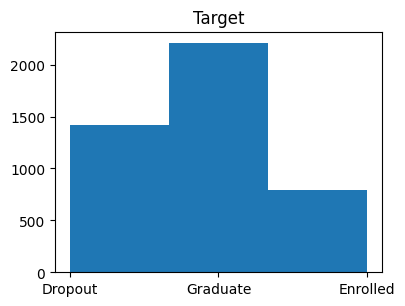

Dropout:    1421   ( 32.1%)
Graduate:   2209   ( 49.9%)
Enrolled:    794   ( 17.9%)
Total:      4424
===== Marital status =====


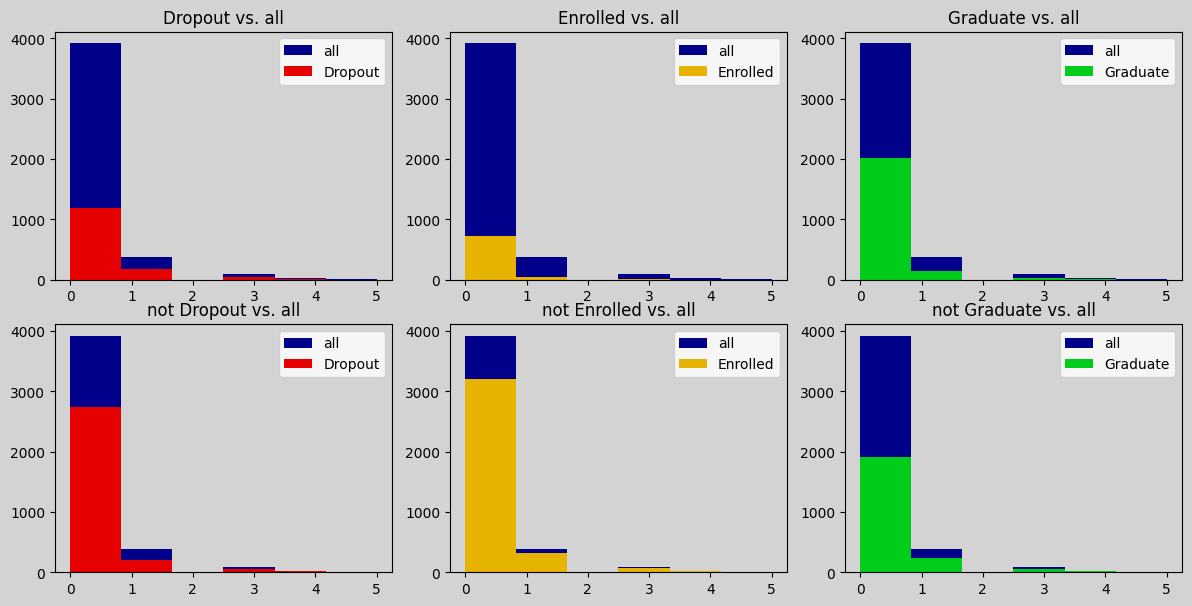

| Marital status ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) single                  |             1184 |              720 |             2015 |             3919 |
| (2) married                 |              179 |               52 |              148 |              379 |
| (3) widower                 |                1 |                2 |                1 |                4 |
| (4) divorced                |               42 |               16 |               33 |               91 |
| (5) facto union             |               11 |                3 |               11 |               25 |
| (6) legally separated       |                4 |                1 |                1 |                6 |

===== Application mode =====


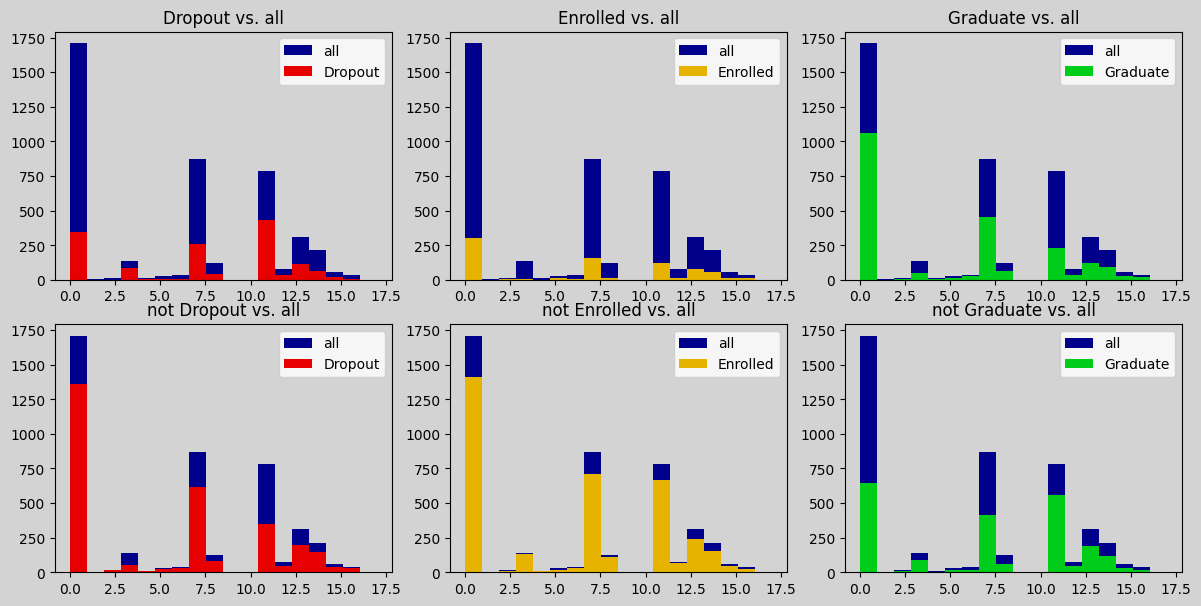

| Application mode ↓ / Target →                 |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) 1st phase - general contingent            |              345 |              300 |             1063 |             1708 |
| (2) Ordinance No. 612/93                      |                2 |                0 |                1 |                3 |
| (5) 1st phase - speci...ngent (Azores Island) |                2 |                8 |                6 |               16 |
| (7) Holders of other higher courses           |               85 |                7 |               47 |              139 |
| (10) Ordinance No. 854-B/99                   |                3 |                0 |                7 |               10 |
| (15) International student (bachelor)         |                5 |               10 |               15 |            

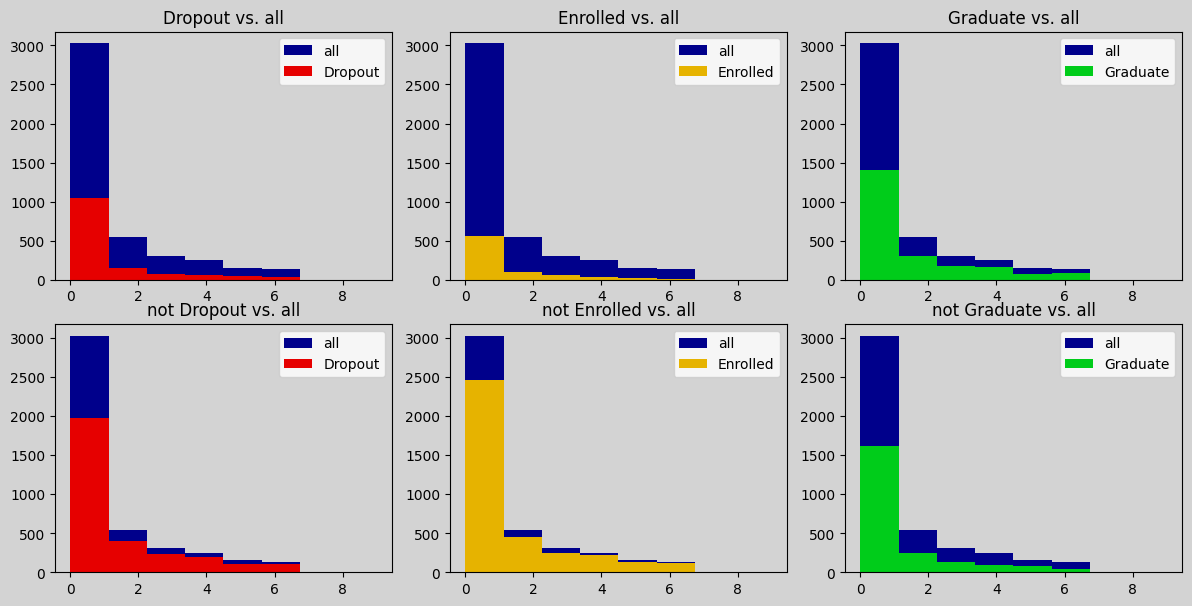

| Application order ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------ | ---------------- | ---------------- | ---------------- | ---------------- |
| 0                              |                0 |                0 |                1 |                1 |
| 1                              |             1053 |              565 |             1408 |             3026 |
| 2                              |              150 |               96 |              301 |              547 |
| 3                              |               76 |               60 |              173 |              309 |
| 4                              |               58 |               31 |              160 |              249 |
| 5                              |               53 |               25 |               76 |              154 |
| 6                              |               31 |               16 |               90 |              137 |
|

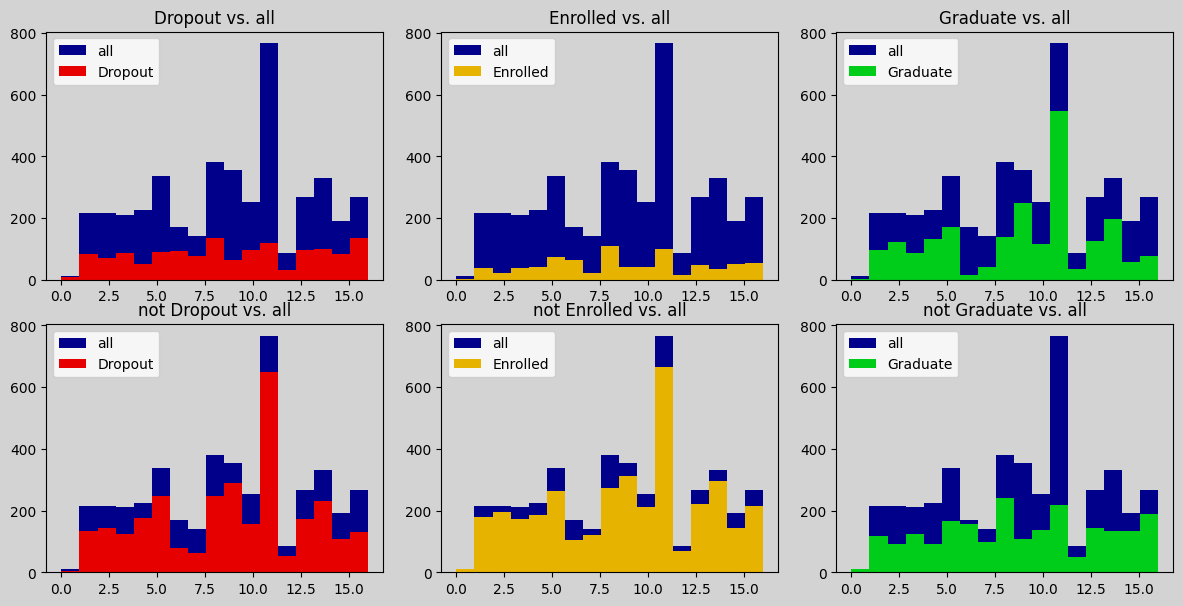

| Course ↓ / Target →                         |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (33) Biofuel Production Technologies        |                8 |                3 |                1 |               12 |
| (171) Animation and Multimedia Design       |               82 |               37 |               96 |              215 |
| (8014) Social Service (evening attendance)  |               71 |               21 |              123 |              215 |
| (9003) Agronomy                             |               86 |               37 |               87 |              210 |
| (9070) Communication Design                 |               51 |               42 |              133 |              226 |
| (9085) Veterinary Nursing                   |               90 |               75 |              172 |              337 |
| (9119)

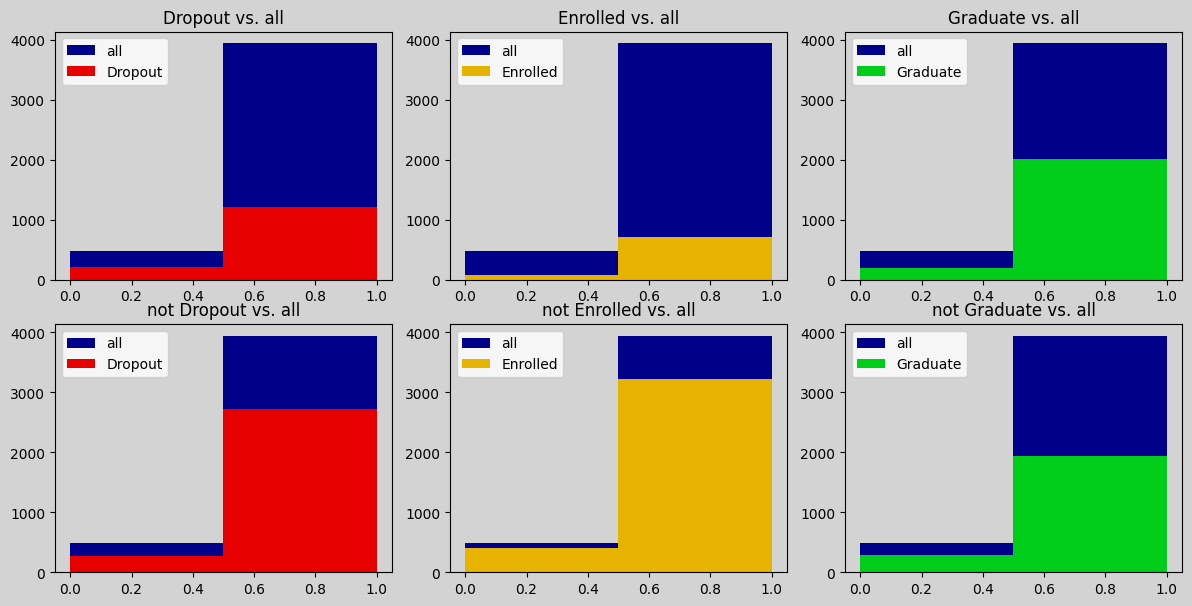

| Daytime/evening attendance ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) evening                             |              207 |               75 |              201 |              483 |
| (1) daytime                             |             1214 |              719 |             2008 |             3941 |

===== Previous qualification =====
(Education Level)


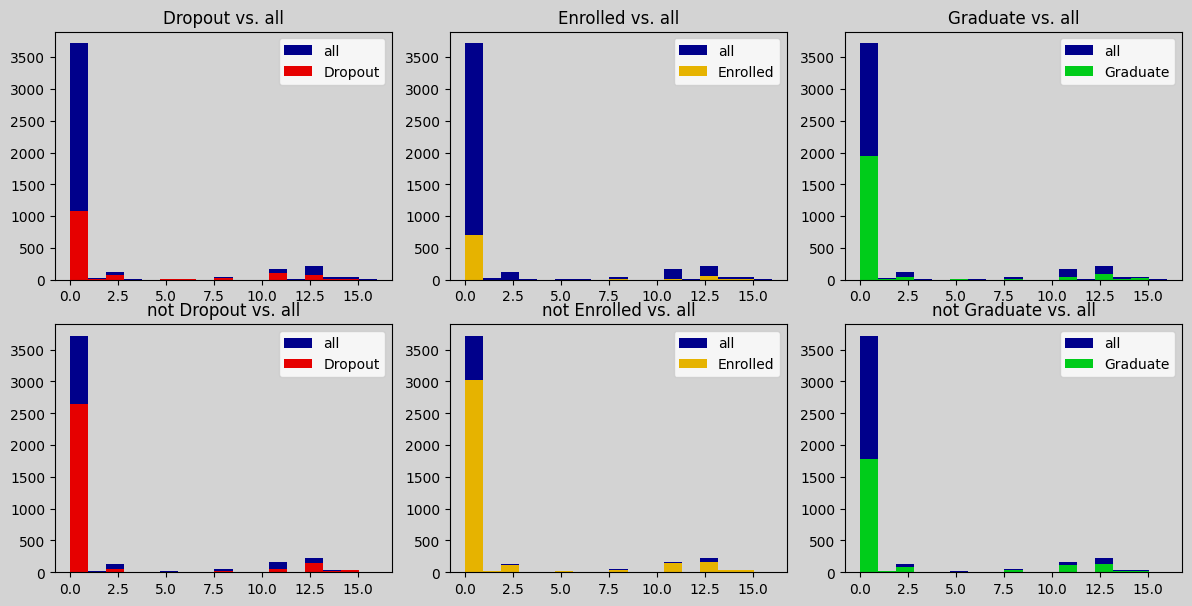

| Previous qualification ↓ / Target →           |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary education                       |             1078 |              698 |             1941 |             3717 |
| (2) Higher education - bachelor's degree      |               16 |                1 |                6 |               23 |
| (3) Higher education - degree                 |               75 |                4 |               47 |              126 |
| (4) Higher education - master's               |                4 |                1 |                3 |                8 |
| (5) Higher education - doctorate              |                1 |                0 |                0 |                1 |
| (6) Frequency of higher education             |                7 |                1 |                8 |            

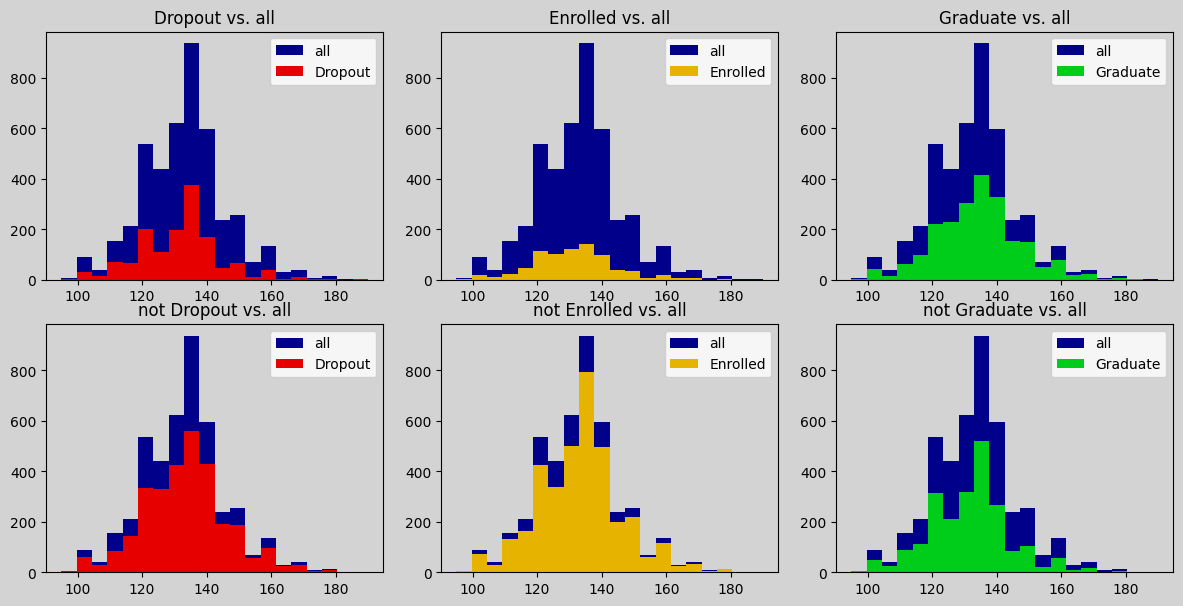

| Previous qualification (grade)   |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    95.000 |   190.000 |   132.613 |    13.188 |     0.313 |     0.968 |
| Dropout                          |    95.000 |   190.000 |   131.114 |    12.873 |     0.425 |     1.548 |
| Enrolled                         |    96.000 |   190.000 |   131.208 |    12.872 |     0.428 |     1.434 |
| Graduate                         |    97.000 |   184.400 |   134.083 |    13.342 |     0.200 |     0.627 |

===== Nacionality =====
(Nationality)


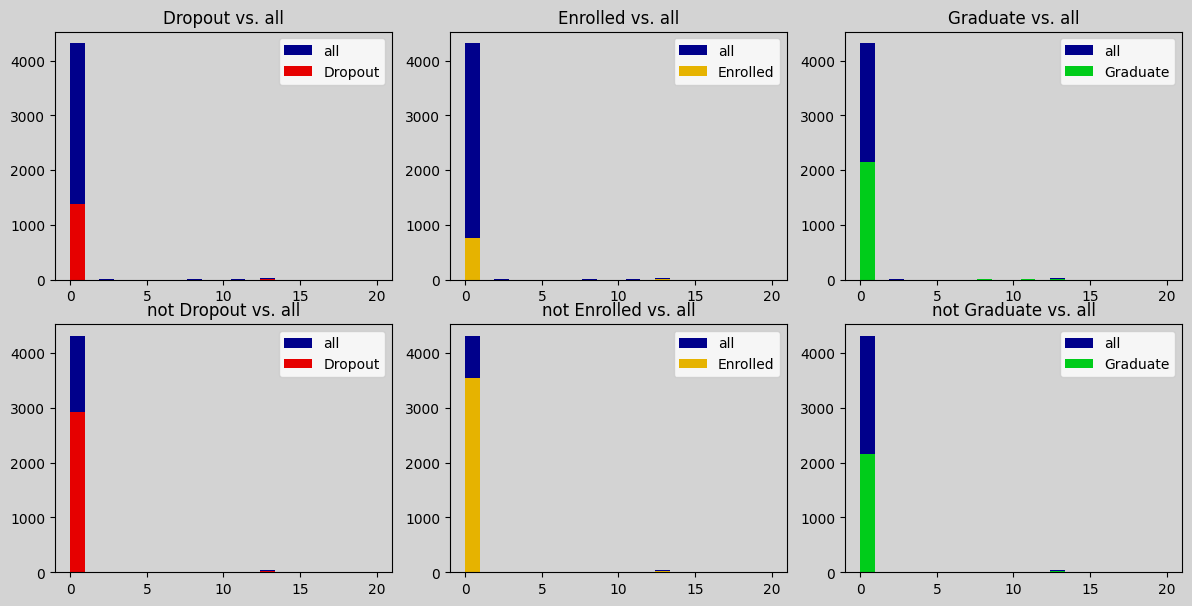

| Nacionality ↓ / Target →    |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) Portuguese              |             1389 |              770 |             2155 |             4314 |
| (2) German                  |                0 |                0 |                2 |                2 |
| (6) Spanish                 |                4 |                5 |                4 |               13 |
| (11) Italian                |                0 |                0 |                3 |                3 |
| (13) Dutch                  |                0 |                0 |                1 |                1 |
| (14) English                |                0 |                0 |                1 |                1 |
| (17) Lithuanian             |                1 |                0 |                0 |                1 |
| (21) Angolan              

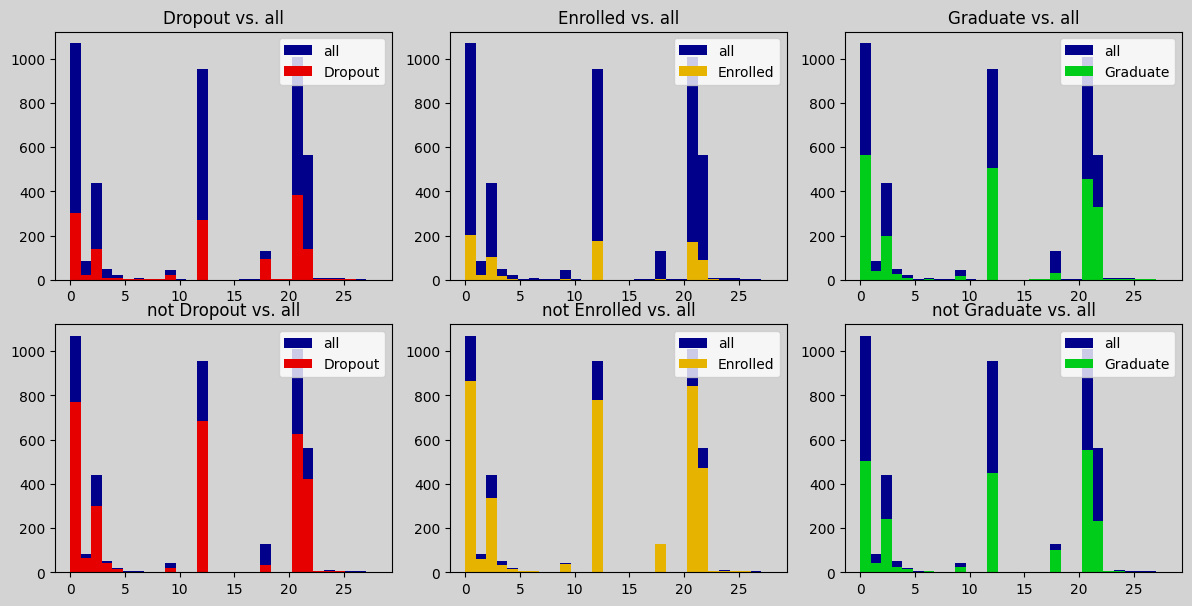

| Mother's qualification ↓ / Target →           |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary Educati...r of Schooling or Eq. |              300 |              204 |              565 |             1069 |
| (2) Higher Education - Bachelor's Degree      |               20 |               23 |               40 |               83 |
| (3) Higher Education - Degree                 |              139 |              101 |              198 |              438 |
| (4) Higher Education - Master's               |                8 |               15 |               26 |               49 |
| (5) Higher Education - Doctorate              |                8 |                5 |                8 |               21 |
| (6) Frequency of Higher Education             |                3 |                0 |                1 |            

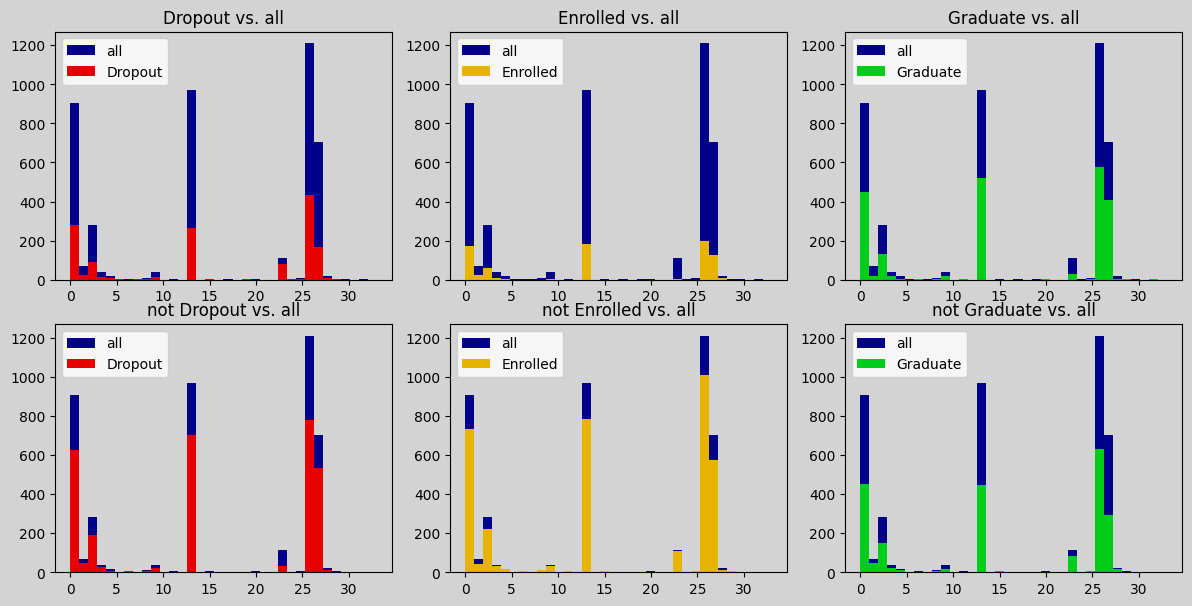

| Father's qualification ↓ / Target →           |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary Educati...r of Schooling or Eq. |              281 |              172 |              451 |              904 |
| (2) Higher Education - Bachelor's Degree      |               22 |               25 |               21 |               68 |
| (3) Higher Education - Degree                 |               90 |               62 |              130 |              282 |
| (4) Higher Education - Master's               |               14 |                7 |               18 |               39 |
| (5) Higher Education - Doctorate              |               10 |                3 |                5 |               18 |
| (6) Frequency of Higher Education             |                2 |                0 |                0 |            

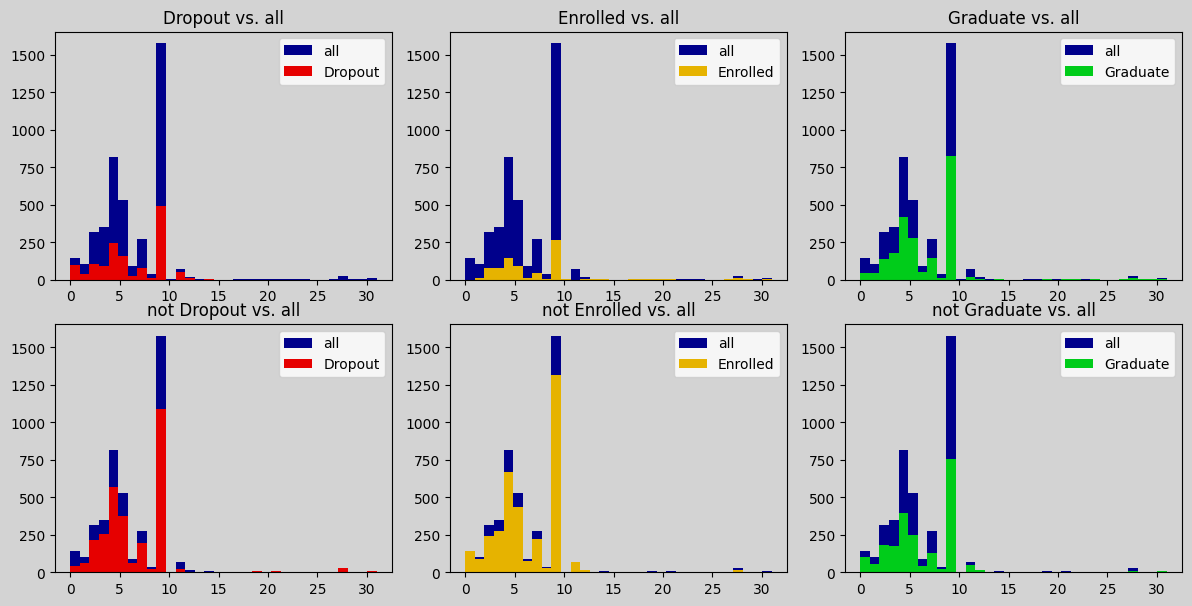

| Mother's occupation ↓ / Target →              |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) Student                                   |               99 |                1 |               44 |              144 |
| (1) Representatives o...nd Executive Managers |               39 |               15 |               48 |              102 |
| (2) Specialists in In...Scientific Activities |              102 |               78 |              138 |              318 |
| (3) Intermediate Leve...cians and Professions |               95 |               79 |              177 |              351 |
| (4) Administrative staff                      |              248 |              147 |              422 |              817 |
| (5) Personal Services...y Workers and Sellers |              156 |               94 |              280 |            

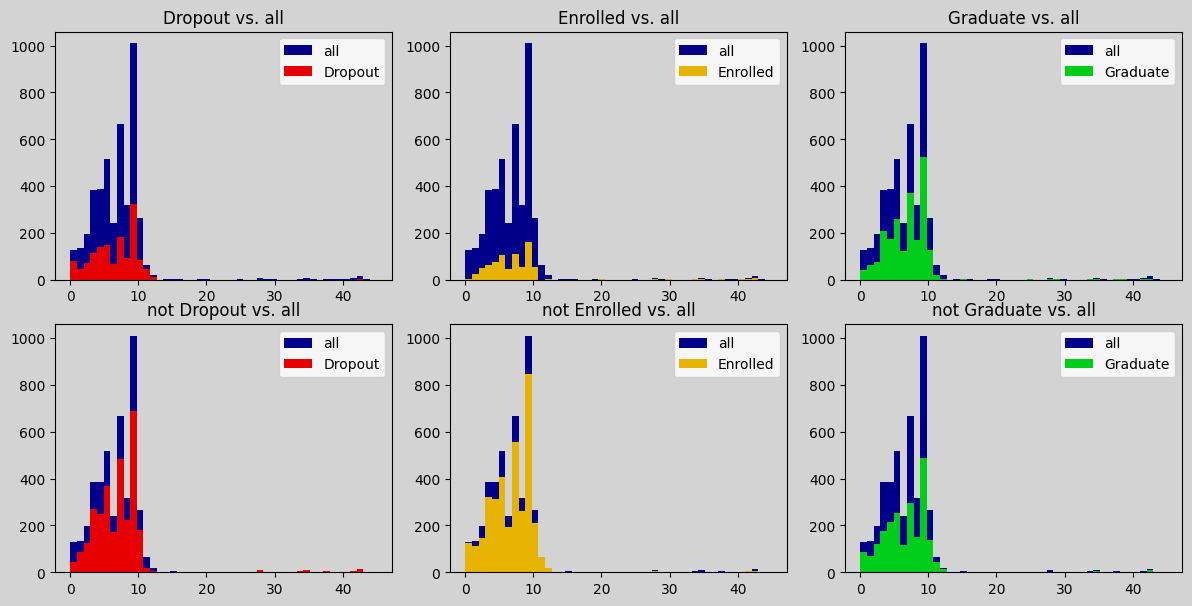

| Father's occupation ↓ / Target →              |          Dropout |         Enrolled |         Graduate |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) Student                                   |               82 |                3 |               43 |              128 |
| (1) Representatives o...nd Executive Managers |               48 |               23 |               63 |              134 |
| (2) Specialists in In...Scientific Activities |               70 |               50 |               77 |              197 |
| (3) Intermediate Leve...cians and Professions |              114 |               63 |              207 |              384 |
| (4) Administrative staff                      |              139 |               74 |              173 |              386 |
| (5) Personal Services...y Workers and Sellers |              148 |              107 |              261 |            

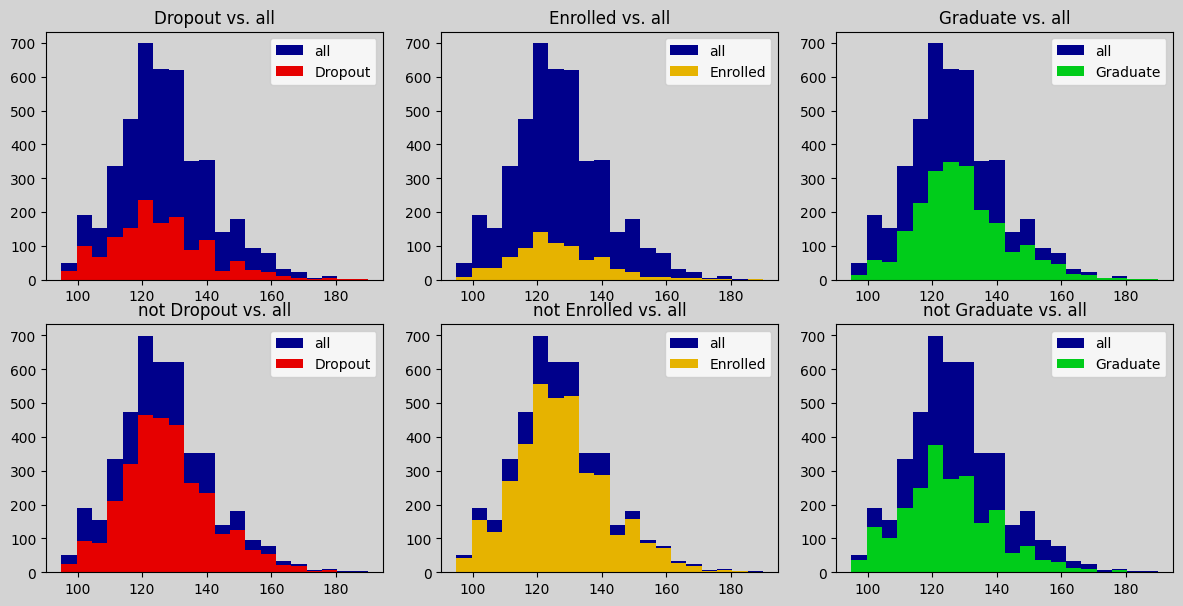

| Admission grade                  |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    95.000 |   190.000 |   126.978 |    14.482 |     0.531 |     0.663 |
| Dropout                          |    95.000 |   190.000 |   124.961 |    15.125 |     0.532 |     0.537 |
| Enrolled                         |    95.000 |   190.000 |   125.534 |    13.793 |     0.628 |     1.217 |
| Graduate                         |    95.000 |   190.000 |   128.794 |    14.071 |     0.561 |     0.638 |

===== Displaced =====


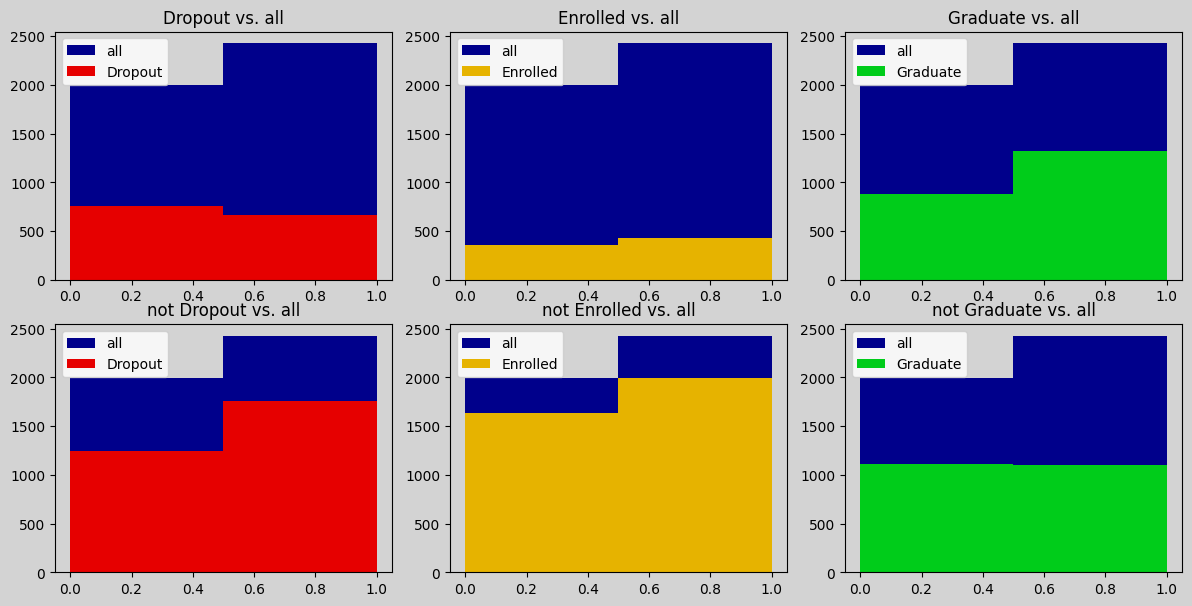

| Displaced ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ---------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                 |              752 |              361 |              885 |             1998 |
| (1) yes                |              669 |              433 |             1324 |             2426 |

===== Educational special needs =====


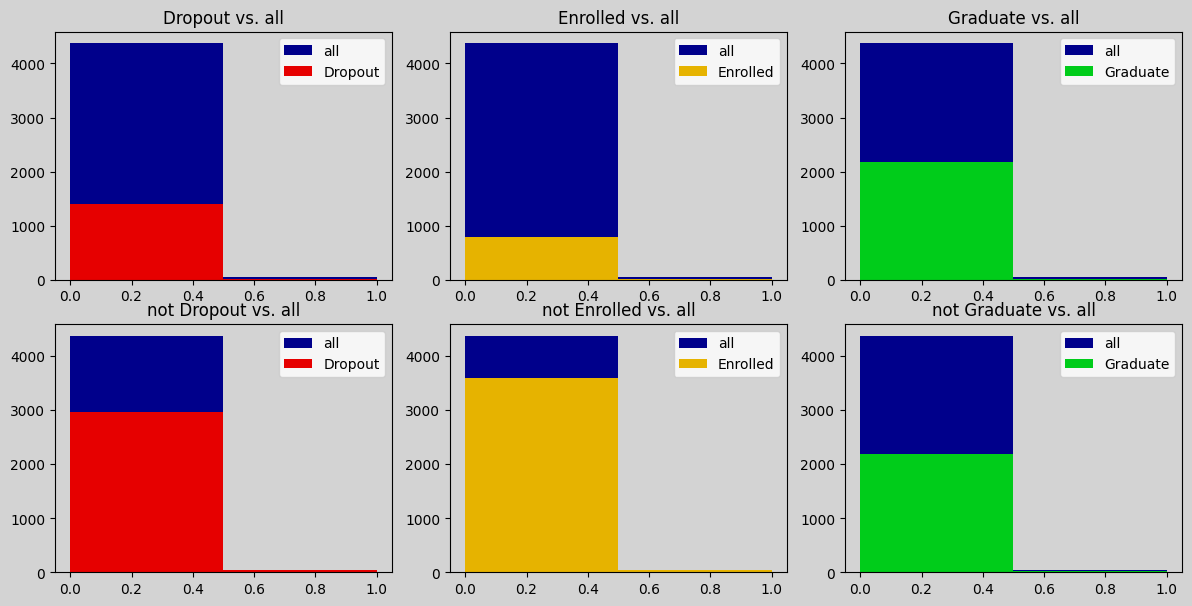

| Educational special needs ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| -------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                                 |             1404 |              783 |             2186 |             4373 |
| (1) yes                                |               17 |               11 |               23 |               51 |

===== Debtor =====


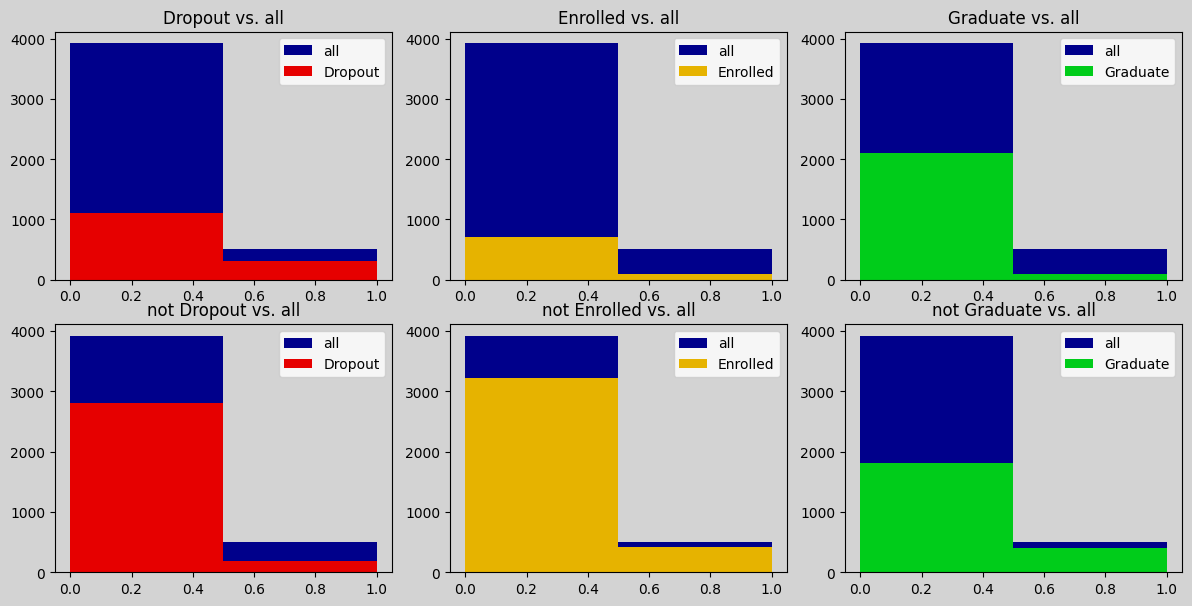

| Debtor ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no              |             1109 |              704 |             2108 |             3921 |
| (1) yes             |              312 |               90 |              101 |              503 |

===== Tuition fees up to date =====


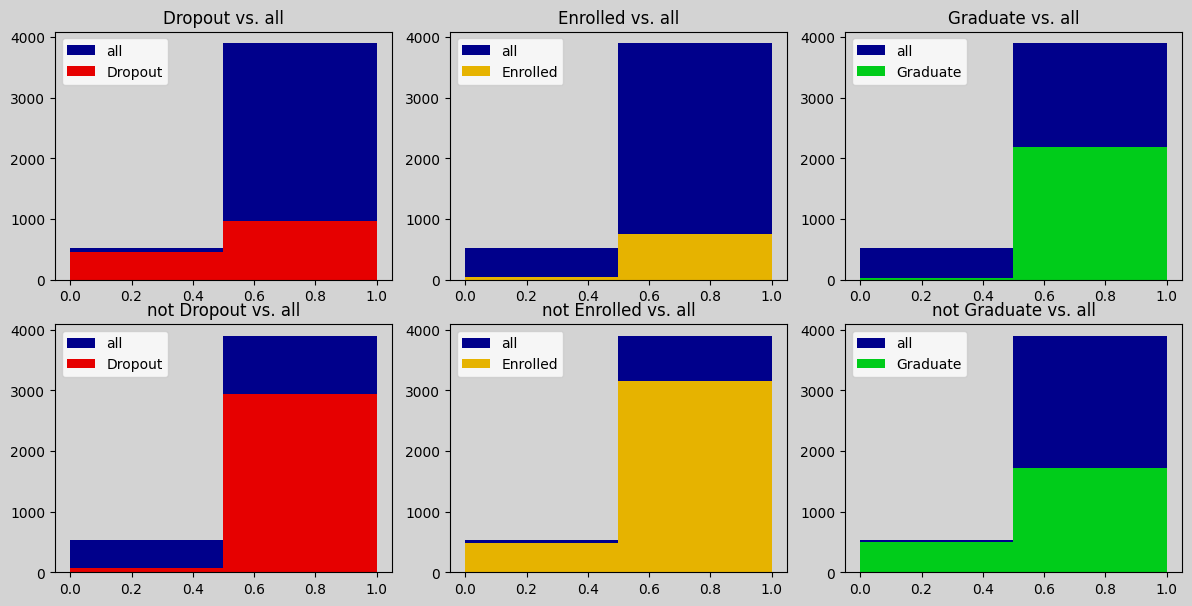

| Tuition fees up to date ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------------ | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                               |              457 |               42 |               29 |              528 |
| (1) yes                              |              964 |              752 |             2180 |             3896 |

===== Gender =====


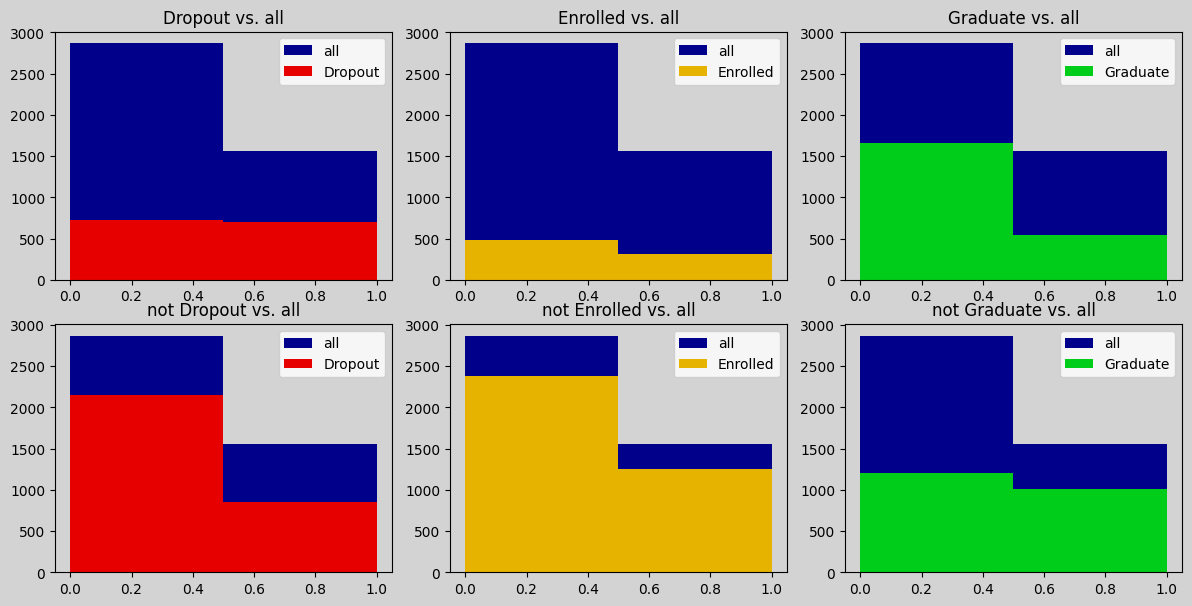

| Gender ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) female          |              720 |              487 |             1661 |             2868 |
| (1) male            |              701 |              307 |              548 |             1556 |

===== Scholarship holder =====


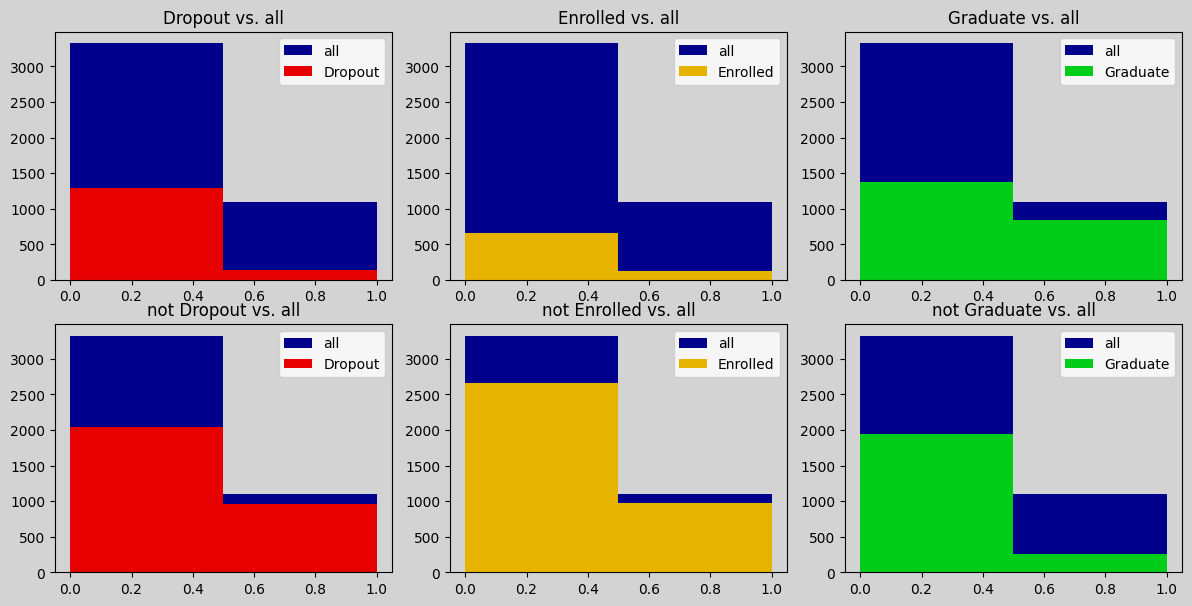

| Scholarship holder ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| ------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                          |             1287 |              664 |             1374 |             3325 |
| (1) yes                         |              134 |              130 |              835 |             1099 |

===== Age at enrollment =====
(Age) Age of studend at enrollment


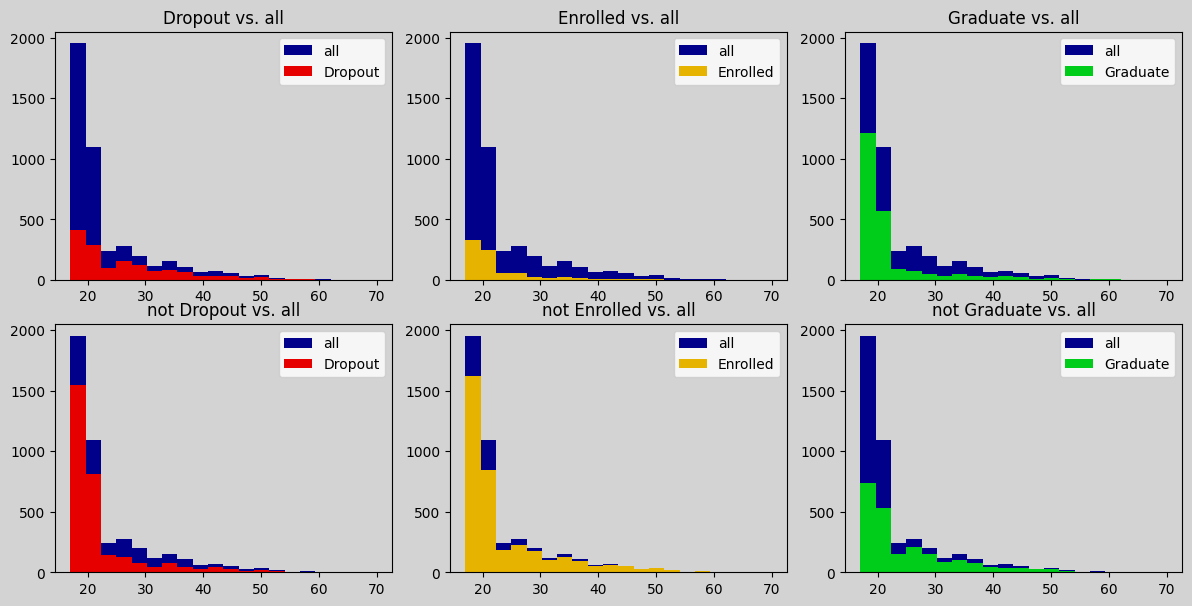

| Age at enrollment                |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    17.000 |    70.000 |    23.265 |     7.588 |     2.055 |     4.127 |
| Dropout                          |    18.000 |    70.000 |    26.069 |     8.704 |     1.358 |     1.521 |
| Enrolled                         |    17.000 |    54.000 |    22.369 |     6.303 |     2.323 |     5.465 |
| Graduate                         |    17.000 |    62.000 |    21.784 |     6.693 |     2.774 |     8.030 |

===== International =====


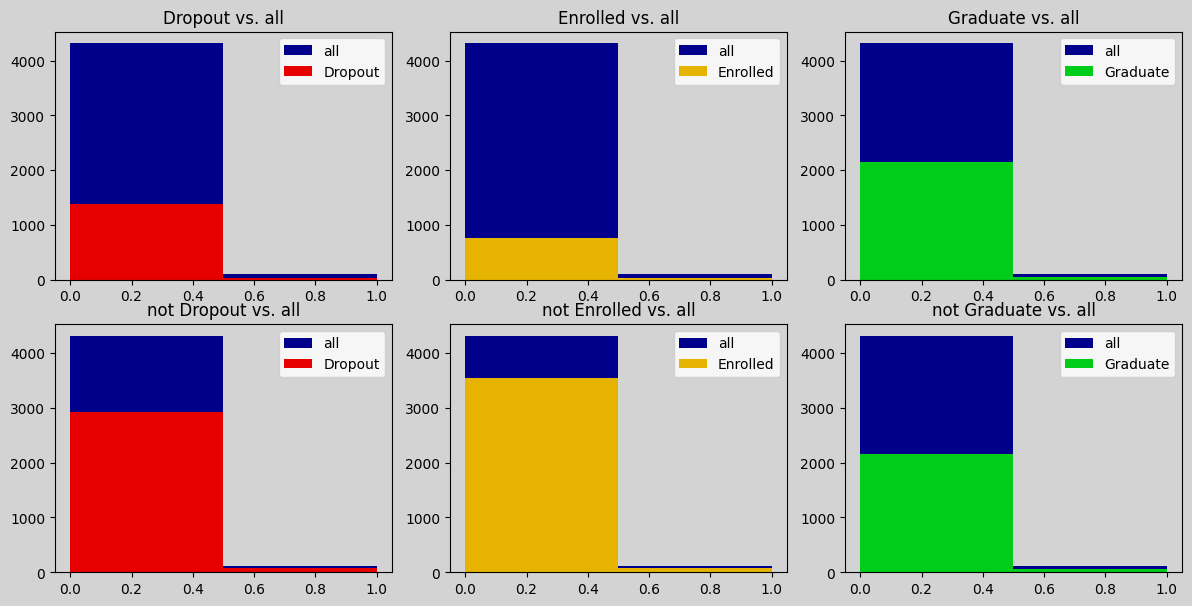

| International ↓ / Target → |          Dropout |         Enrolled |         Graduate |            Total |
| -------------------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (0) no                     |             1389 |              770 |             2155 |             4314 |
| (1) yes                    |               32 |               24 |               54 |              110 |

===== Curricular units 1st sem (credited) =====
Number of curricular units credited in the 1st semester


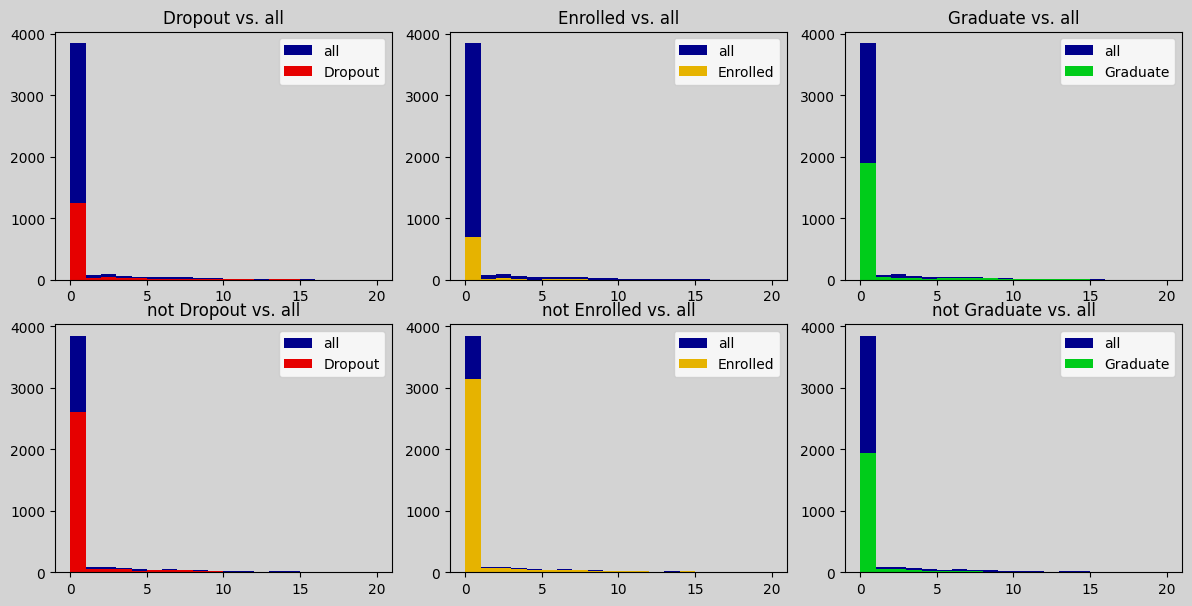

| C. u. 1st sem (credited)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    20.000 |     0.710 |     2.361 |     4.169 |    19.206 |
| Dropout                          |     0.000 |    18.000 |     0.609 |     2.105 |     4.400 |    21.118 |
| Enrolled                         |     0.000 |    14.000 |     0.508 |     1.716 |     4.197 |    19.528 |
| Graduate                         |     0.000 |    20.000 |     0.847 |     2.686 |     3.841 |    15.892 |

===== Curricular units 1st sem (enrolled) =====
Number of curricular units enrolled in the 1st semester


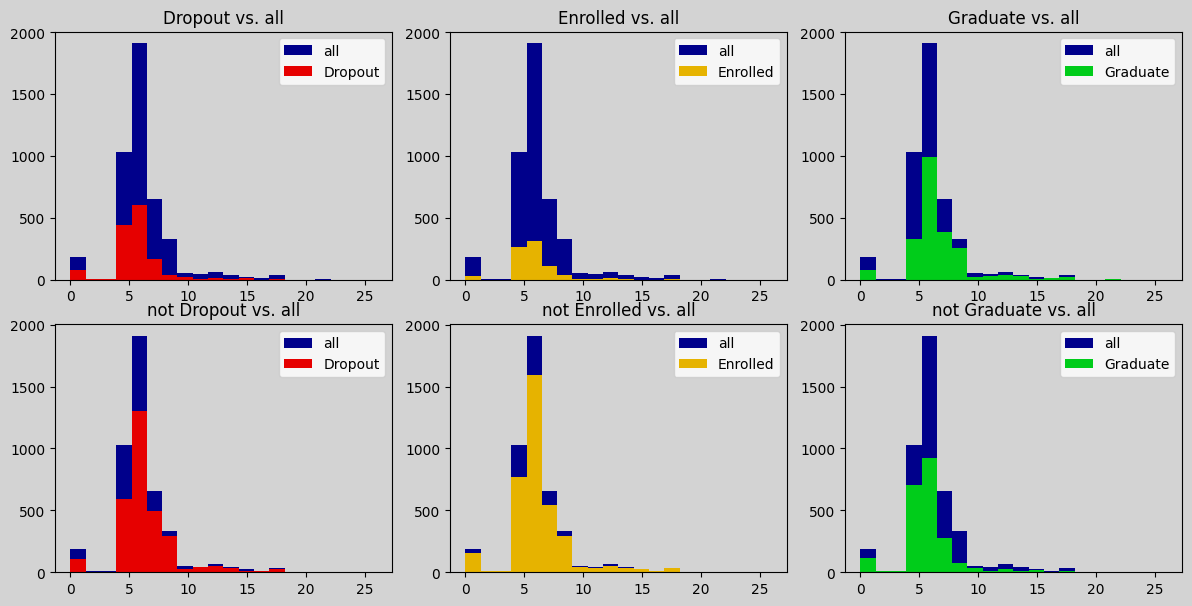

| C. u. 1st sem (enrolled)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    26.000 |     6.271 |     2.480 |     1.619 |     8.938 |
| Dropout                          |     0.000 |    21.000 |     5.821 |     2.326 |     1.045 |     7.320 |
| Enrolled                         |     0.000 |    17.000 |     5.965 |     1.988 |     0.886 |     7.774 |
| Graduate                         |     0.000 |    26.000 |     6.670 |     2.665 |     1.906 |     8.911 |

===== Curricular units 1st sem (evaluations) =====
Number of evaluations to curricular units in the 1st semester


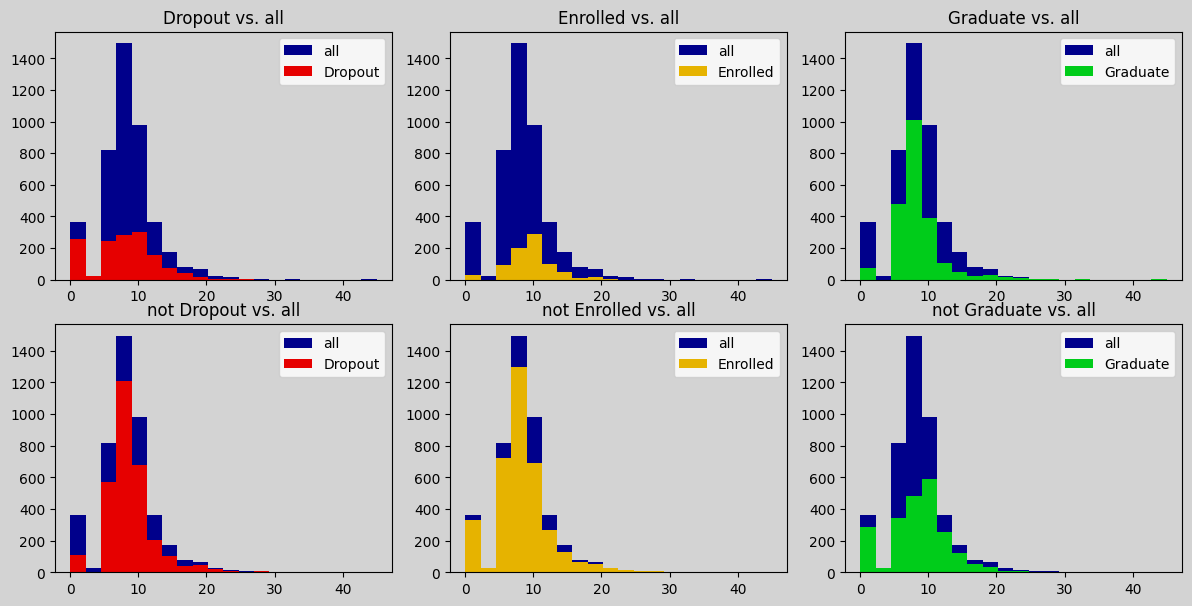

| C. u. 1st sem (evaluations)      |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    45.000 |     8.299 |     4.179 |     0.977 |     5.463 |
| Dropout                          |     0.000 |    31.000 |     7.752 |     4.922 |     0.220 |     0.343 |
| Enrolled                         |     0.000 |    24.000 |     9.341 |     3.463 |     0.083 |     1.592 |
| Graduate                         |     0.000 |    45.000 |     8.277 |     3.810 |     2.488 |    14.406 |

===== Curricular units 1st sem (approved) =====
Number of curricular units approved in the 1st semester


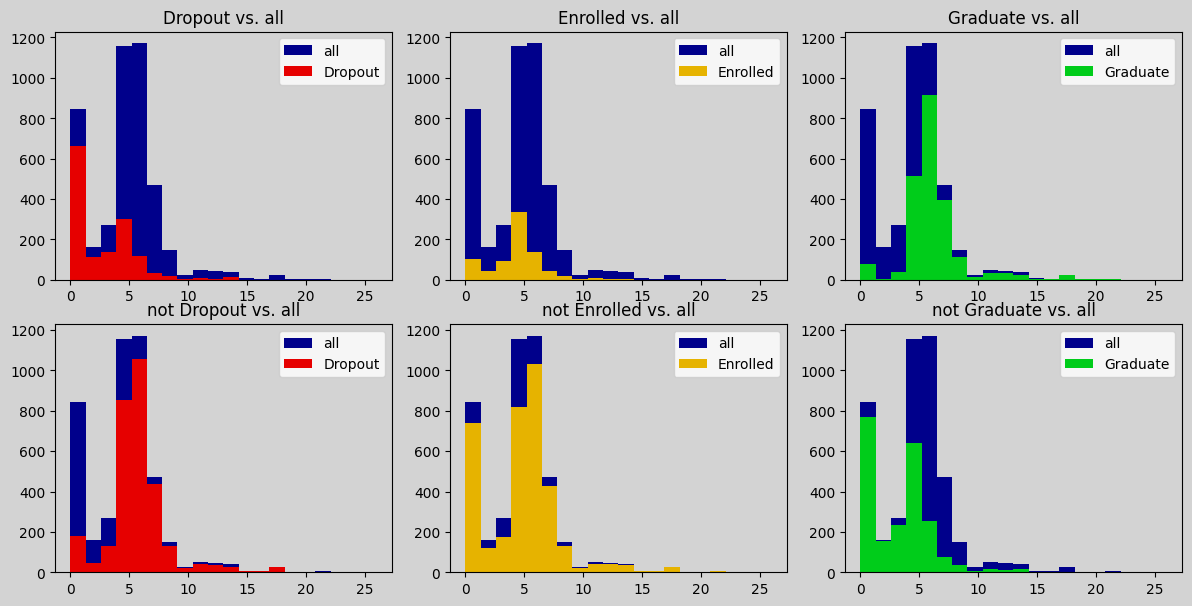

| C. u. 1st sem (approved)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    26.000 |     4.707 |     3.094 |     0.766 |     3.097 |
| Dropout                          |     0.000 |    21.000 |     2.552 |     2.858 |     1.364 |     2.951 |
| Enrolled                         |     0.000 |    15.000 |     4.319 |     2.289 |     0.285 |     1.593 |
| Graduate                         |     0.000 |    26.000 |     6.232 |     2.583 |     1.875 |     9.138 |

===== Curricular units 1st sem (grade) =====
Grade average in the 1st semester (between 0 and 20)


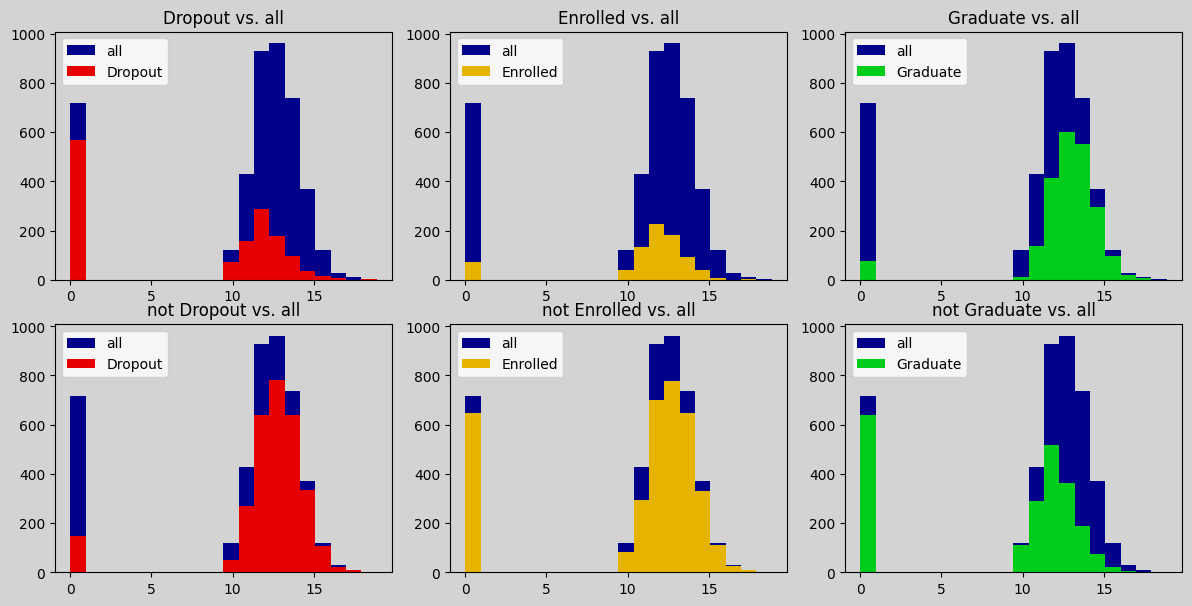

| Curricular units 1st sem (grade) |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    18.875 |    10.641 |     4.844 |    -1.568 |     0.908 |
| Dropout                          |     0.000 |    18.000 |     7.257 |     6.031 |    -0.309 |    -1.768 |
| Enrolled                         |     0.000 |    17.000 |    11.125 |     3.675 |    -2.361 |     4.682 |
| Graduate                         |     0.000 |    18.875 |    12.644 |     2.699 |    -3.450 |    14.028 |

===== Curricular units 1st sem (without evaluations) =====
Number of curricular units without evalutions in the 1st semester


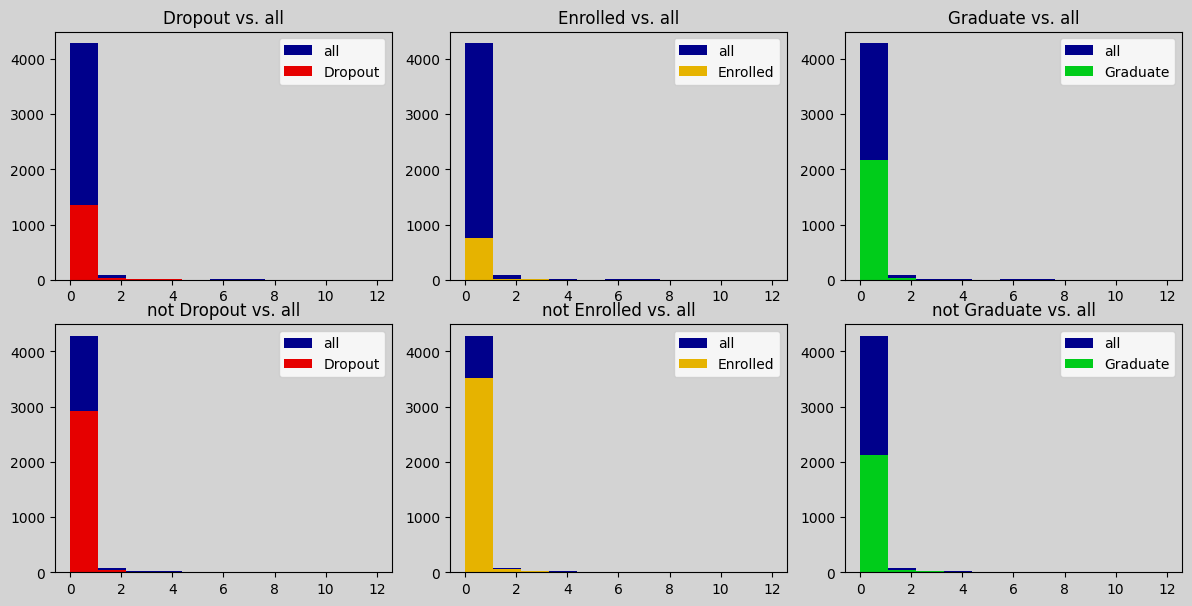

| C. u. 1st sem ...t evaluations)  |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    12.000 |     0.138 |     0.691 |     8.207 |    89.863 |
| Dropout                          |     0.000 |     8.000 |     0.192 |     0.795 |     5.750 |    39.198 |
| Enrolled                         |     0.000 |     8.000 |     0.178 |     0.741 |     6.365 |    50.766 |
| Graduate                         |     0.000 |    12.000 |     0.088 |     0.590 |    12.685 |   210.154 |

===== Curricular units 2nd sem (credited) =====
Number of curricular units credited in the 2nd semester


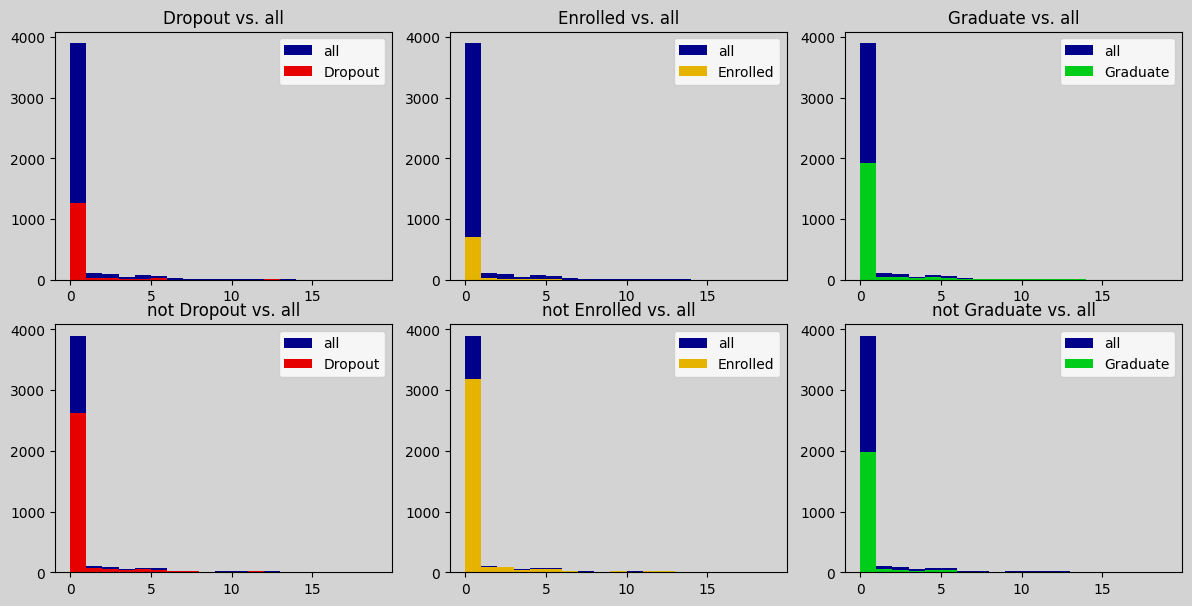

| C. u. 2nd sem (credited)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    19.000 |     0.542 |     1.919 |     4.635 |    24.427 |
| Dropout                          |     0.000 |    16.000 |     0.450 |     1.680 |     4.958 |    27.899 |
| Enrolled                         |     0.000 |    12.000 |     0.359 |     1.329 |     4.737 |    25.576 |
| Graduate                         |     0.000 |    19.000 |     0.667 |     2.212 |     4.208 |    19.591 |

===== Curricular units 2nd sem (enrolled) =====
Number of curricular units enrolled in the 2nd semester


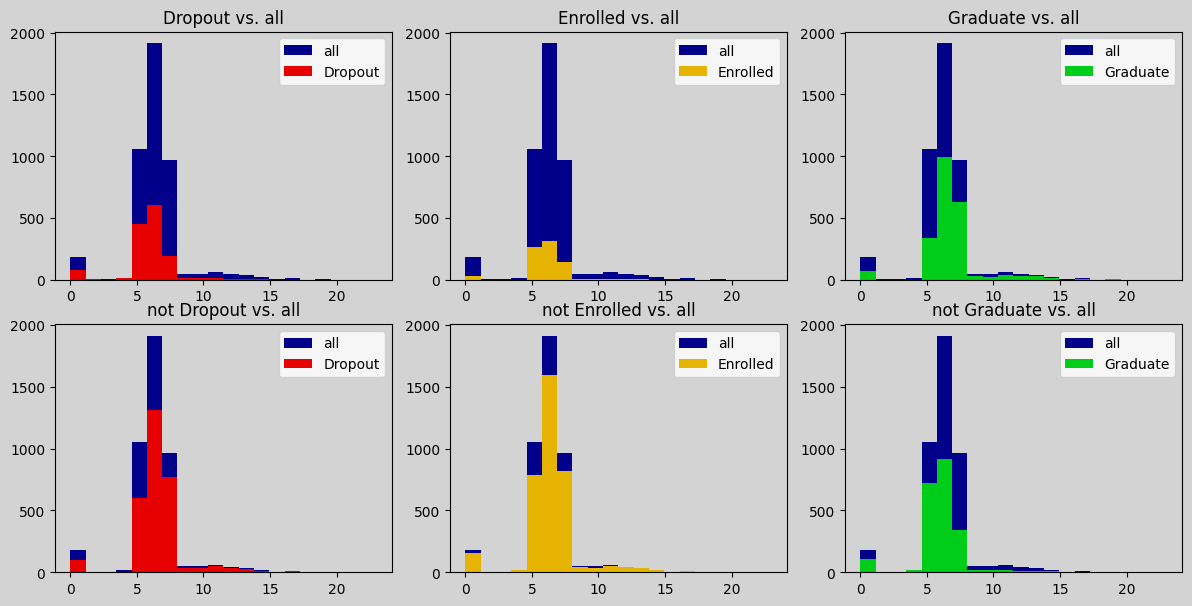

| C. u. 2nd sem (enrolled)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    23.000 |     6.232 |     2.196 |     0.788 |     7.135 |
| Dropout                          |     0.000 |    18.000 |     5.780 |     2.108 |     0.365 |     6.001 |
| Enrolled                         |     0.000 |    17.000 |     5.938 |     1.831 |     0.321 |     7.194 |
| Graduate                         |     0.000 |    23.000 |     6.628 |     2.297 |     1.030 |     7.529 |

===== Curricular units 2nd sem (evaluations) =====
Number of evaluations to curricular units in the 2nd semester


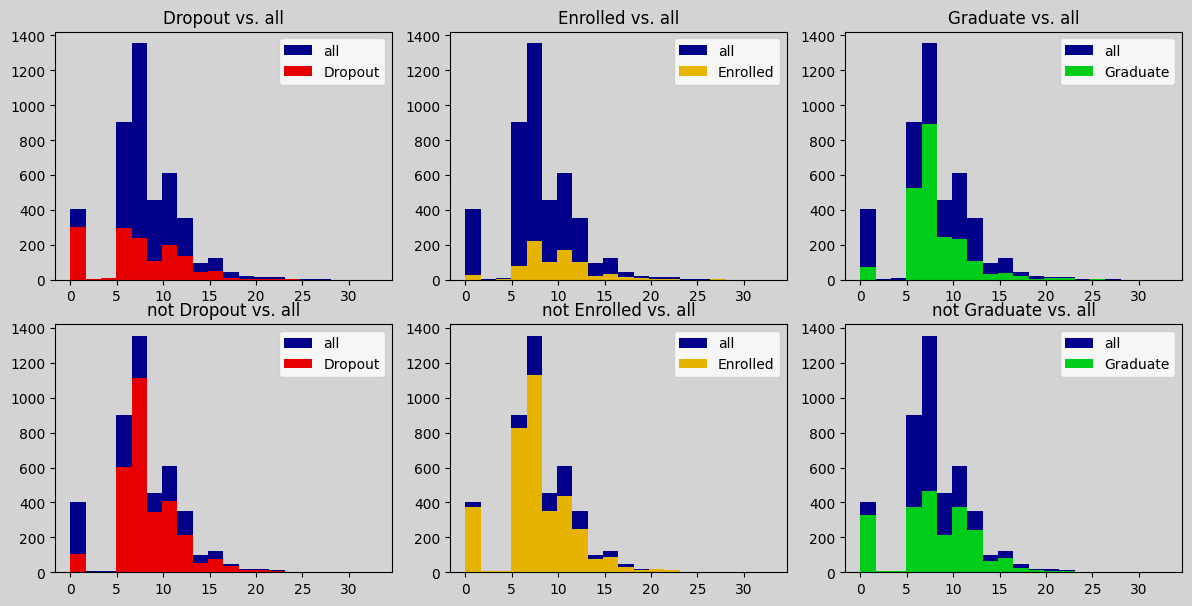

| C. u. 2nd sem (evaluations)      |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    33.000 |     8.063 |     3.948 |     0.336 |     2.068 |
| Dropout                          |     0.000 |    25.000 |     7.174 |     4.817 |     0.127 |    -0.180 |
| Enrolled                         |     0.000 |    28.000 |     9.436 |     3.567 |     0.390 |     2.754 |
| Graduate                         |     0.000 |    33.000 |     8.142 |     3.246 |     1.290 |     6.170 |

===== Curricular units 2nd sem (approved) =====
Number of curricular units approved in the 2nd semester


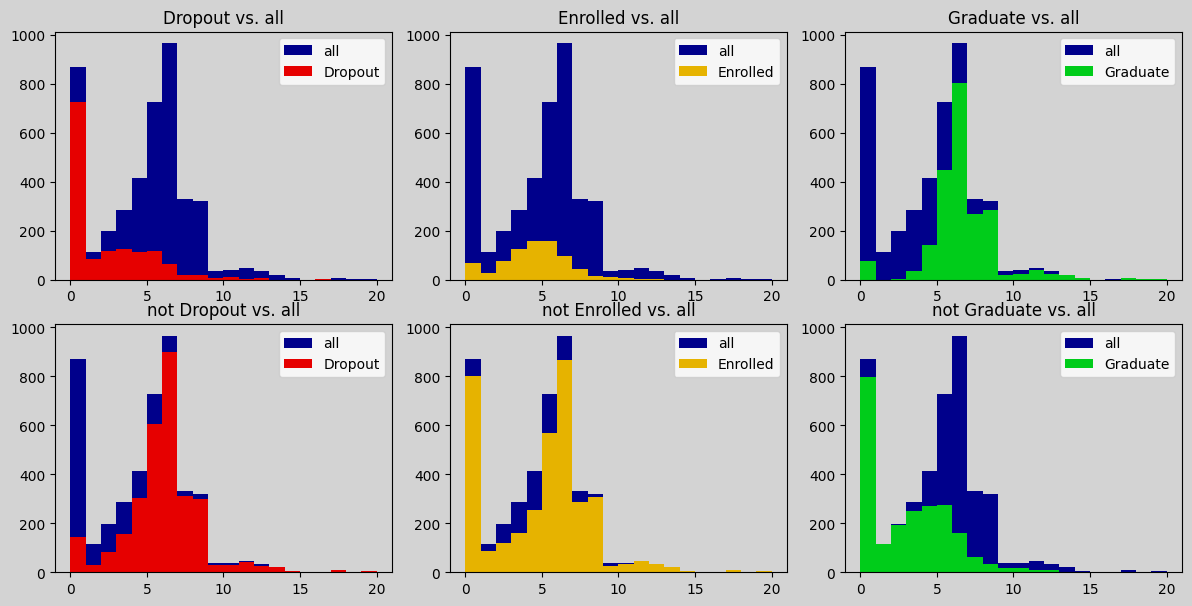

| C. u. 2nd sem (approved)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    20.000 |     4.436 |     3.015 |     0.306 |     0.845 |
| Dropout                          |     0.000 |    16.000 |     1.940 |     2.574 |     1.467 |     2.399 |
| Enrolled                         |     0.000 |    12.000 |     4.058 |     2.180 |     0.202 |     0.484 |
| Graduate                         |     0.000 |    20.000 |     6.177 |     2.269 |     1.002 |     6.358 |

===== Curricular units 2nd sem (grade) =====
Grade average in the 2nd semester (between 0 and 20)


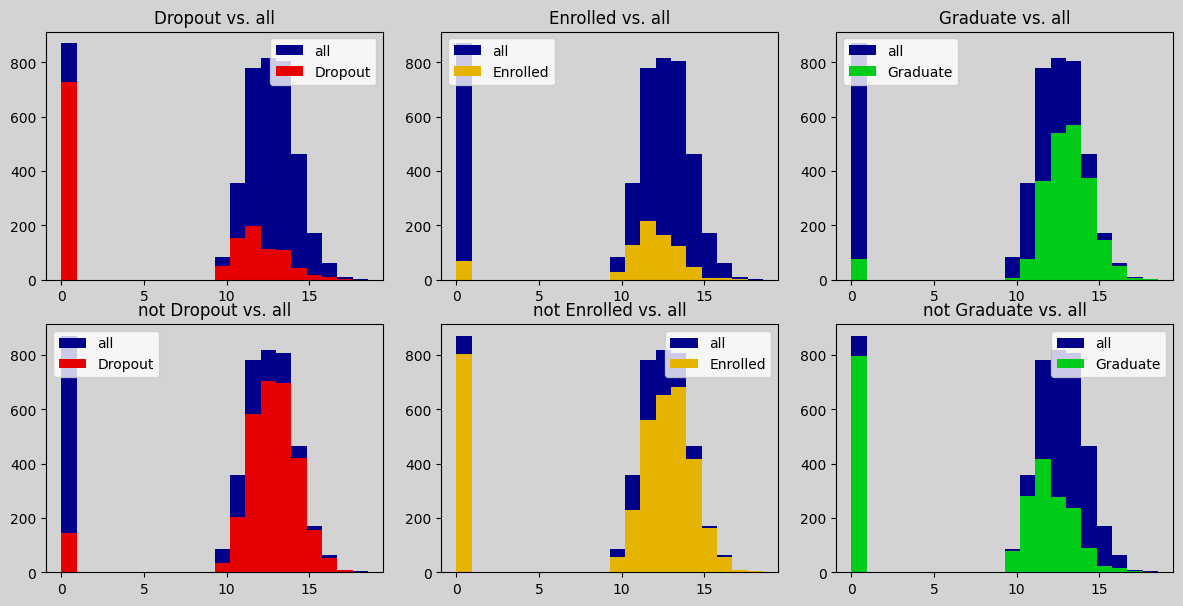

| Curricular units 2nd sem (grade) |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    18.571 |    10.230 |     5.211 |    -1.314 |     0.067 |
| Dropout                          |     0.000 |    17.714 |     5.899 |     6.119 |     0.127 |    -1.871 |
| Enrolled                         |     0.000 |    17.600 |    11.117 |     3.601 |    -2.393 |     4.967 |
| Graduate                         |     0.000 |    18.571 |    12.697 |     2.686 |    -3.448 |    14.212 |

===== Curricular units 2nd sem (without evaluations) =====
Number of curricular units without evalutions in the 1st semester


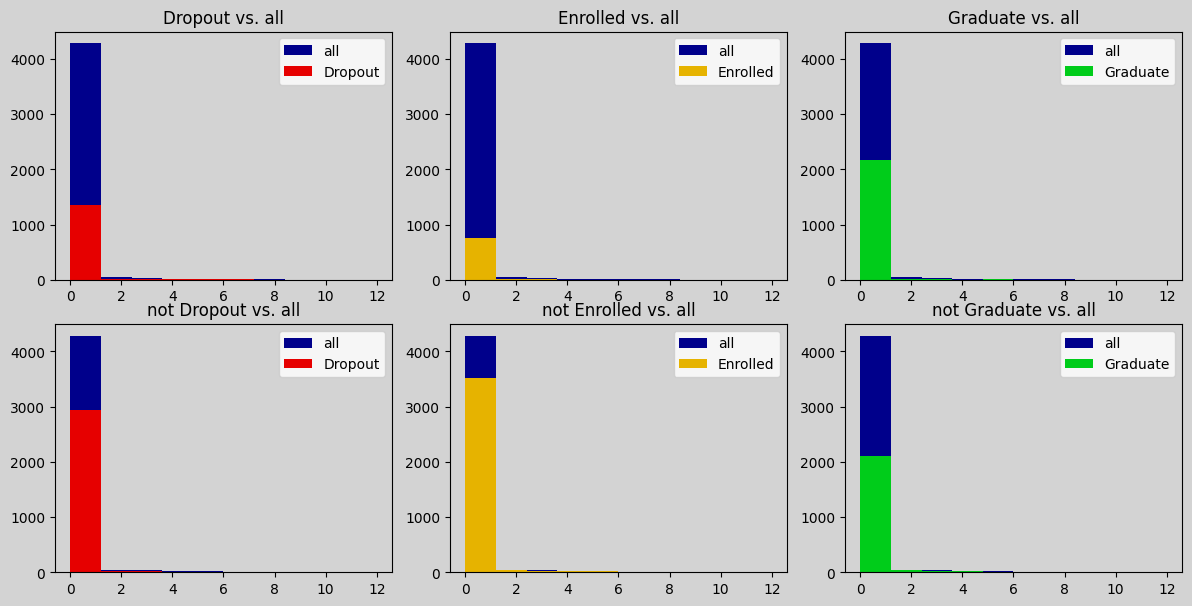

| C. u. 2nd sem ...t evaluations)  |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    12.000 |     0.150 |     0.754 |     7.268 |    66.812 |
| Dropout                          |     0.000 |    12.000 |     0.238 |     0.994 |     5.603 |    37.466 |
| Enrolled                         |     0.000 |     8.000 |     0.188 |     0.780 |     5.882 |    42.341 |
| Graduate                         |     0.000 |    12.000 |     0.081 |     0.523 |    10.924 |   168.332 |

===== Unemployment rate =====
Unemployment rate (%)


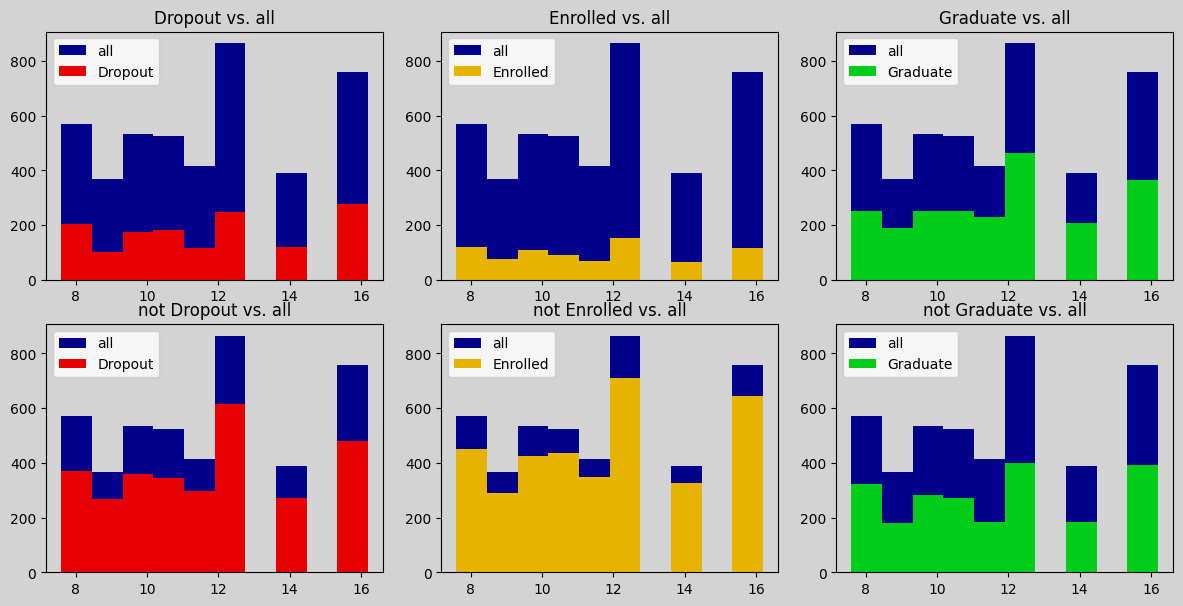

| Unemployment rate                |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     7.600 |    16.200 |    11.566 |     2.664 |     0.212 |    -0.996 |
| Dropout                          |     7.600 |    16.200 |    11.616 |     2.768 |     0.200 |    -1.094 |
| Enrolled                         |     7.600 |    16.200 |    11.273 |     2.628 |     0.316 |    -0.933 |
| Graduate                         |     7.600 |    16.200 |    11.639 |     2.601 |     0.182 |    -0.942 |

===== Inflation rate =====
Inflation rate (%)


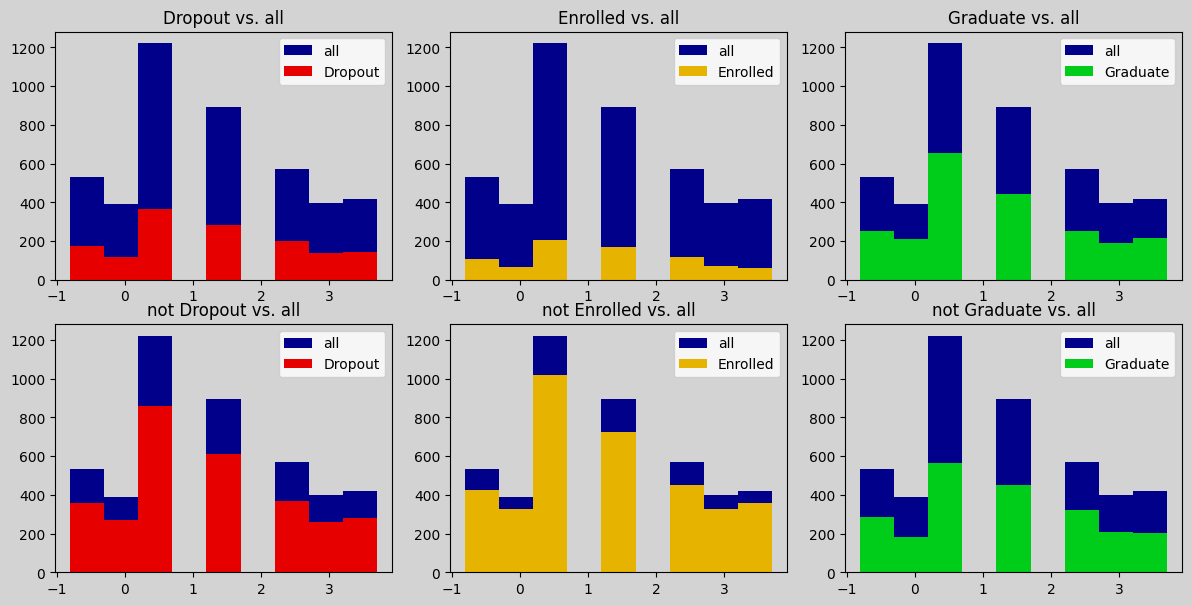

| Inflation rate                   |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    -0.800 |     3.700 |     1.228 |     1.383 |     0.252 |    -1.039 |
| Dropout                          |    -0.800 |     3.700 |     1.284 |     1.405 |     0.170 |    -1.125 |
| Enrolled                         |    -0.800 |     3.700 |     1.212 |     1.373 |     0.183 |    -1.054 |
| Graduate                         |    -0.800 |     3.700 |     1.198 |     1.371 |     0.331 |    -0.965 |

===== GDP =====


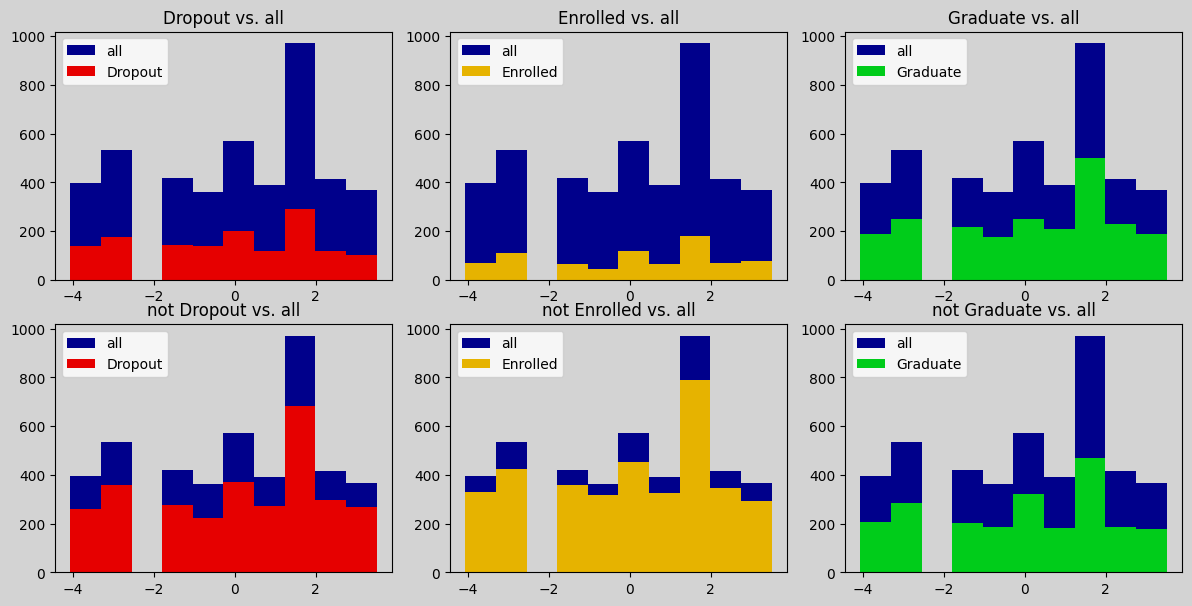

| GDP                              |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    -4.060 |     3.510 |     0.002 |     2.270 |    -0.394 |    -1.002 |
| Dropout                          |    -4.060 |     3.510 |    -0.151 |     2.252 |    -0.316 |    -1.034 |
| Enrolled                         |    -4.060 |     3.510 |     0.053 |     2.316 |    -0.412 |    -1.023 |
| Graduate                         |    -4.060 |     3.510 |     0.082 |     2.261 |    -0.442 |    -0.960 |



In [52]:
plt_layout(1, 1, (4, 3))
plt_hist(target, data[target], bins=len(data[target].unique()))
plt_show()

for k, v in cl.Counter(data[target]).items():
    print(f"{k + ':':10} {v:>5}   ({v * 100.0 / len(data):5.1f}%)")

print(f"{'Total:':10} {len(data):>5}")

gen_histograms_and_tables(data, data.columns, target, targets)

Plots and tables (by Gender)
----------------------------

===== Marital status =====


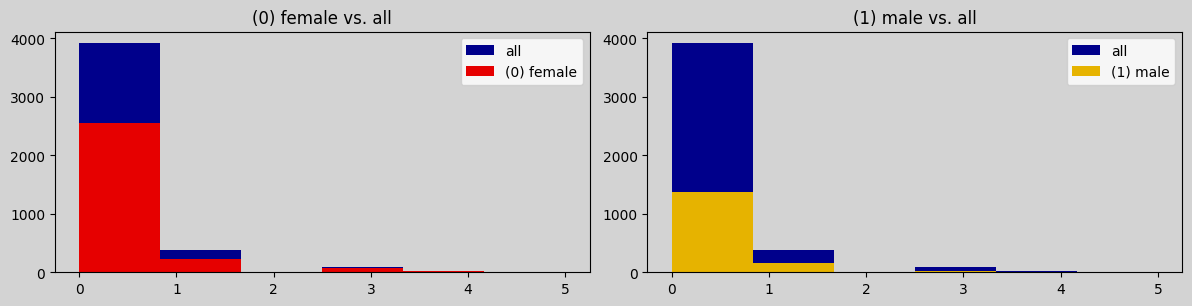

| Marital status ↓ / Target → |       (0) female |         (1) male |            Total |
| --------------------------- | ---------------- | ---------------- | ---------------- |
| (1) single                  |             2552 |             1367 |             3919 |
| (2) married                 |              221 |              158 |              379 |
| (3) widower                 |                3 |                1 |                4 |
| (4) divorced                |               69 |               22 |               91 |
| (5) facto union             |               18 |                7 |               25 |
| (6) legally separated       |                5 |                1 |                6 |

===== Application mode =====


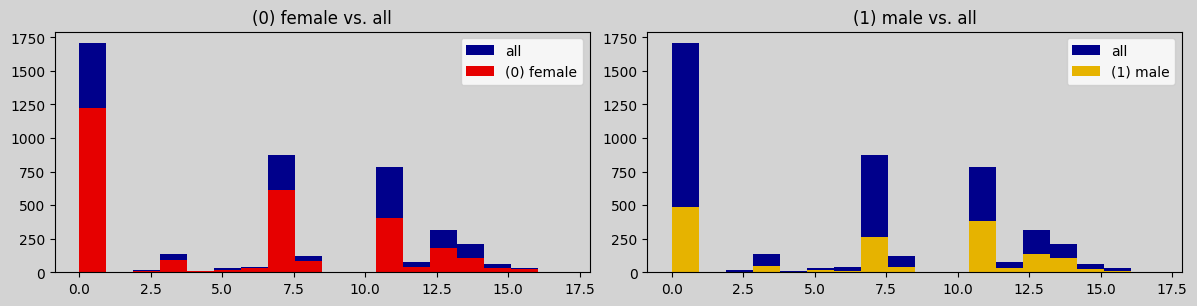

| Application mode ↓ / Target →                 |       (0) female |         (1) male |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (1) 1st phase - general contingent            |             1220 |              488 |             1708 |
| (2) Ordinance No. 612/93                      |                2 |                1 |                3 |
| (5) 1st phase - speci...ngent (Azores Island) |               13 |                3 |               16 |
| (7) Holders of other higher courses           |               93 |               46 |              139 |
| (10) Ordinance No. 854-B/99                   |               10 |                0 |               10 |
| (15) International student (bachelor)         |               15 |               15 |               30 |
| (16) 1st phase - spec...gent (Madeira Island) |               29 |                9 |               38 |
| (17) 2nd phase - general contingent

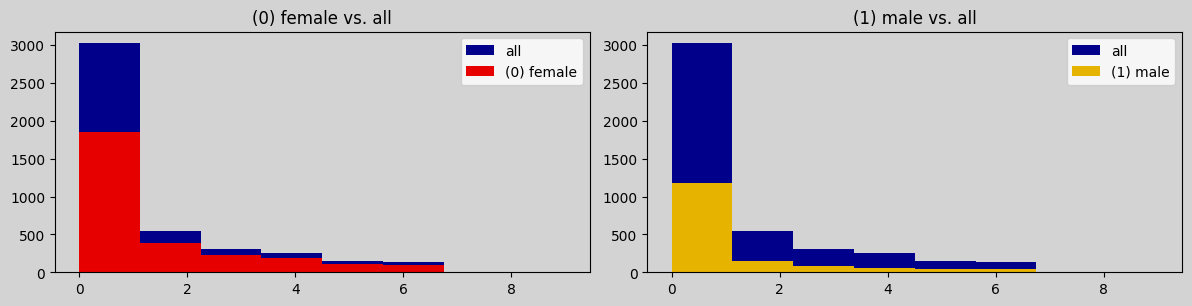

| Application order ↓ / Target → |       (0) female |         (1) male |            Total |
| ------------------------------ | ---------------- | ---------------- | ---------------- |
| 0                              |                1 |                0 |                1 |
| 1                              |             1852 |             1174 |             3026 |
| 2                              |              393 |              154 |              547 |
| 3                              |              228 |               81 |              309 |
| 4                              |              186 |               63 |              249 |
| 5                              |              110 |               44 |              154 |
| 6                              |               98 |               39 |              137 |
| 9                              |                0 |                1 |                1 |

===== Course =====


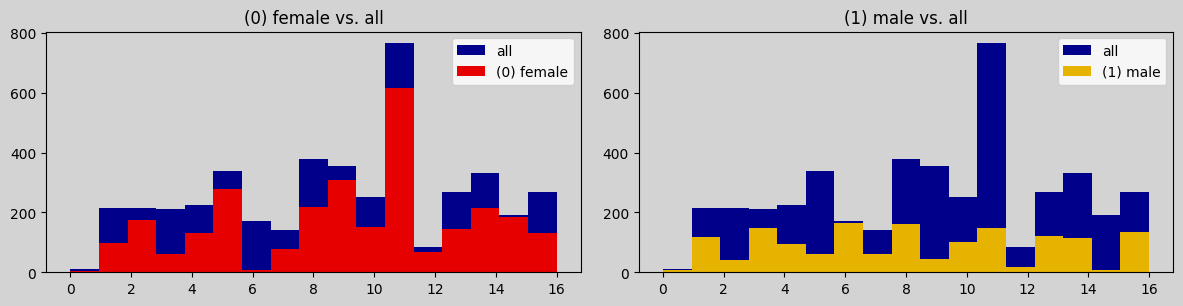

| Course ↓ / Target →                         |       (0) female |         (1) male |            Total |
| ------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (33) Biofuel Production Technologies        |                3 |                9 |               12 |
| (171) Animation and Multimedia Design       |               98 |              117 |              215 |
| (8014) Social Service (evening attendance)  |              173 |               42 |              215 |
| (9003) Agronomy                             |               61 |              149 |              210 |
| (9070) Communication Design                 |              130 |               96 |              226 |
| (9085) Veterinary Nursing                   |              277 |               60 |              337 |
| (9119) Informatics Engineering              |                7 |              163 |              170 |
| (9130) Equinculture                         |        

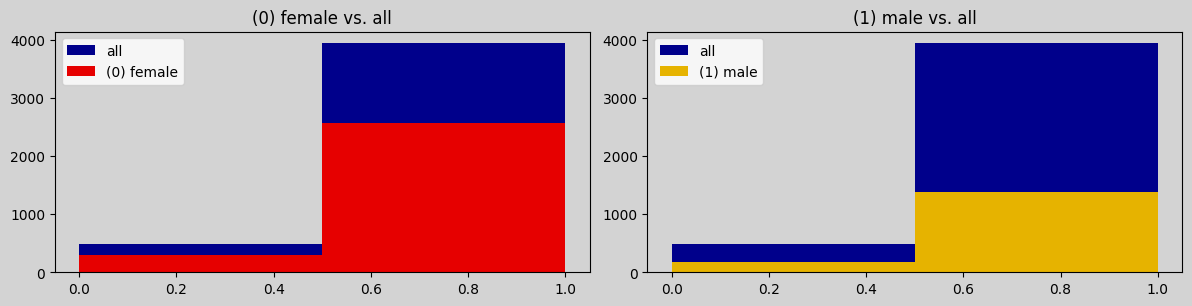

| Daytime/evening attendance ↓ / Target → |       (0) female |         (1) male |            Total |
| --------------------------------------- | ---------------- | ---------------- | ---------------- |
| (0) evening                             |              305 |              178 |              483 |
| (1) daytime                             |             2563 |             1378 |             3941 |

===== Previous qualification =====
(Education Level)


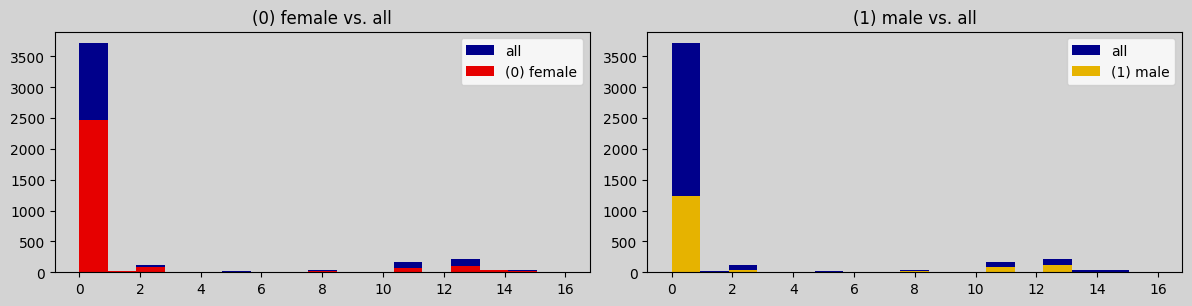

| Previous qualification ↓ / Target →           |       (0) female |         (1) male |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary education                       |             2473 |             1244 |             3717 |
| (2) Higher education - bachelor's degree      |               16 |                7 |               23 |
| (3) Higher education - degree                 |               90 |               36 |              126 |
| (4) Higher education - master's               |                2 |                6 |                8 |
| (5) Higher education - doctorate              |                1 |                0 |                1 |
| (6) Frequency of higher education             |                9 |                7 |               16 |
| (9) 12th year of schooling - not completed    |                5 |                6 |               11 |
| (10) 11th year of schooling - not c

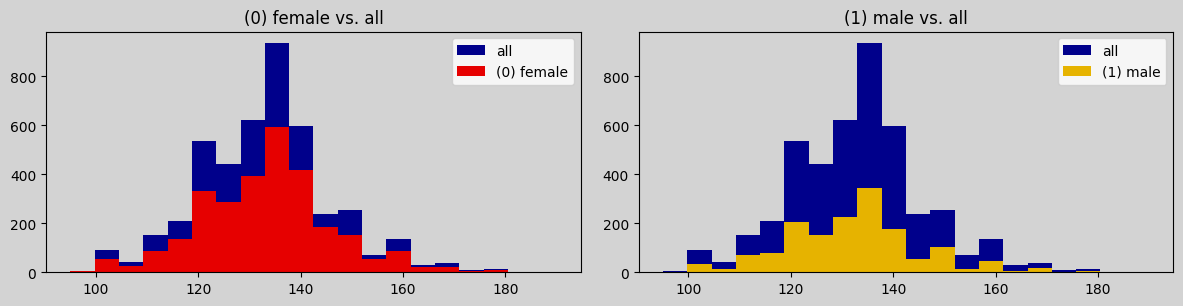

| Previous qualification (grade)   |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    95.000 |   190.000 |   132.613 |    13.188 |     0.313 |     0.968 |
| (0) female                       |    96.000 |   190.000 |   133.078 |    13.049 |     0.282 |     1.011 |
| (1) male                         |    95.000 |   190.000 |   131.756 |    13.404 |     0.379 |     0.939 |

===== Nacionality =====
(Nationality)


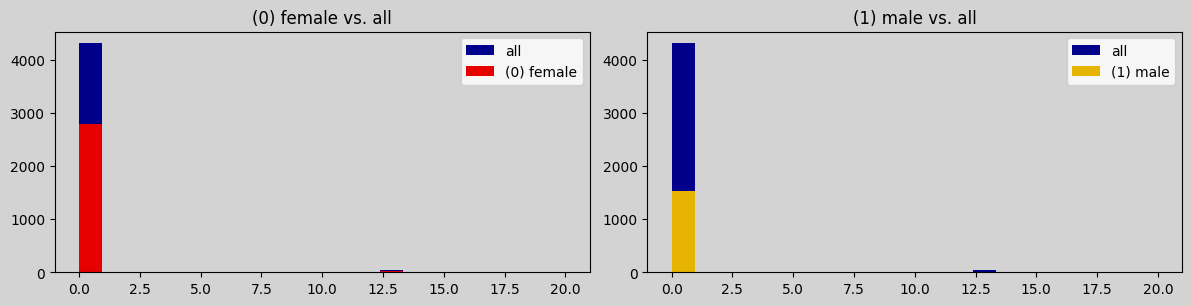

| Nacionality ↓ / Target →    |       (0) female |         (1) male |            Total |
| --------------------------- | ---------------- | ---------------- | ---------------- |
| (1) Portuguese              |             2788 |             1526 |             4314 |
| (2) German                  |                1 |                1 |                2 |
| (6) Spanish                 |               10 |                3 |               13 |
| (11) Italian                |                1 |                2 |                3 |
| (13) Dutch                  |                1 |                0 |                1 |
| (14) English                |                1 |                0 |                1 |
| (17) Lithuanian             |                1 |                0 |                1 |
| (21) Angolan                |                1 |                1 |                2 |
| (22) Cape Verdean           |               11 |                2 |               13 |
| (24) Guinean       

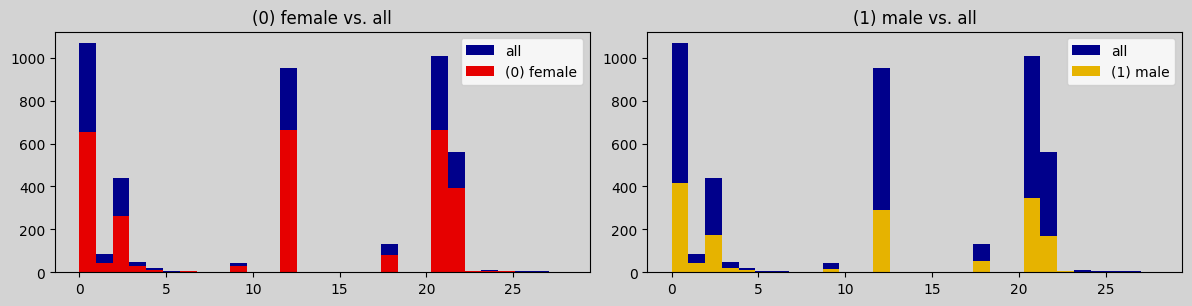

| Mother's qualification ↓ / Target →           |       (0) female |         (1) male |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary Educati...r of Schooling or Eq. |              655 |              414 |             1069 |
| (2) Higher Education - Bachelor's Degree      |               41 |               42 |               83 |
| (3) Higher Education - Degree                 |              262 |              176 |              438 |
| (4) Higher Education - Master's               |               27 |               22 |               49 |
| (5) Higher Education - Doctorate              |               11 |               10 |               21 |
| (6) Frequency of Higher Education             |                2 |                2 |                4 |
| (9) 12th Year of Schooling - Not Completed    |                7 |                1 |                8 |
| (10) 11th Year of Schooling - Not C

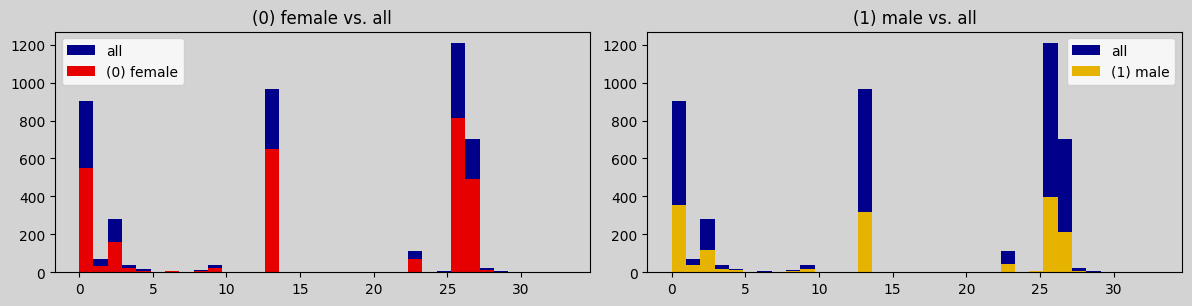

| Father's qualification ↓ / Target →           |       (0) female |         (1) male |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (1) Secondary Educati...r of Schooling or Eq. |              551 |              353 |              904 |
| (2) Higher Education - Bachelor's Degree      |               32 |               36 |               68 |
| (3) Higher Education - Degree                 |              162 |              120 |              282 |
| (4) Higher Education - Master's               |               21 |               18 |               39 |
| (5) Higher Education - Doctorate              |                7 |               11 |               18 |
| (6) Frequency of Higher Education             |                1 |                1 |                2 |
| (9) 12th Year of Schooling - Not Completed    |                5 |                0 |                5 |
| (10) 11th Year of Schooling - Not C

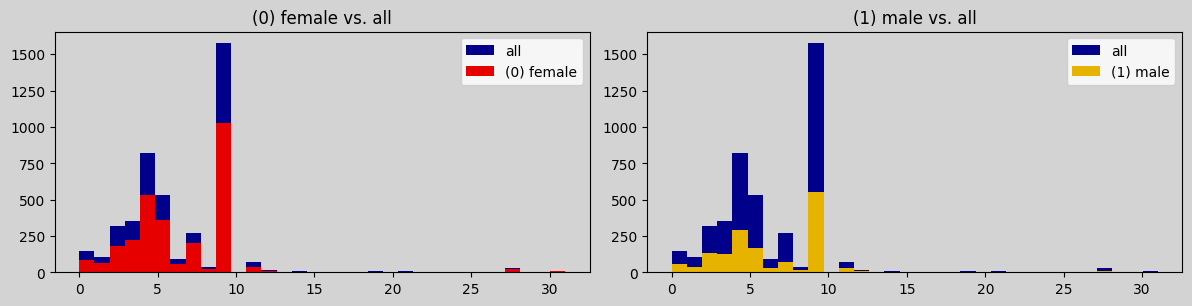

| Mother's occupation ↓ / Target →              |       (0) female |         (1) male |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (0) Student                                   |               86 |               58 |              144 |
| (1) Representatives o...nd Executive Managers |               63 |               39 |              102 |
| (2) Specialists in In...Scientific Activities |              184 |              134 |              318 |
| (3) Intermediate Leve...cians and Professions |              224 |              127 |              351 |
| (4) Administrative staff                      |              529 |              288 |              817 |
| (5) Personal Services...y Workers and Sellers |              360 |              170 |              530 |
| (6) Farmers and Skill...isheries and Forestry |               59 |               32 |               91 |
| (7) Skilled Workers i...ruction and

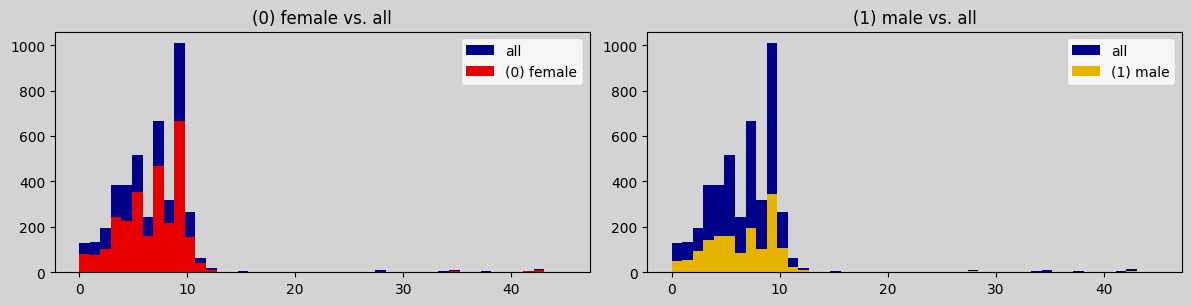

| Father's occupation ↓ / Target →              |       (0) female |         (1) male |            Total |
| --------------------------------------------- | ---------------- | ---------------- | ---------------- |
| (0) Student                                   |               80 |               48 |              128 |
| (1) Representatives o...nd Executive Managers |               78 |               56 |              134 |
| (2) Specialists in In...Scientific Activities |              102 |               95 |              197 |
| (3) Intermediate Leve...cians and Professions |              244 |              140 |              384 |
| (4) Administrative staff                      |              228 |              158 |              386 |
| (5) Personal Services...y Workers and Sellers |              355 |              161 |              516 |
| (6) Farmers and Skill...isheries and Forestry |              158 |               84 |              242 |
| (7) Skilled Workers i...ruction and

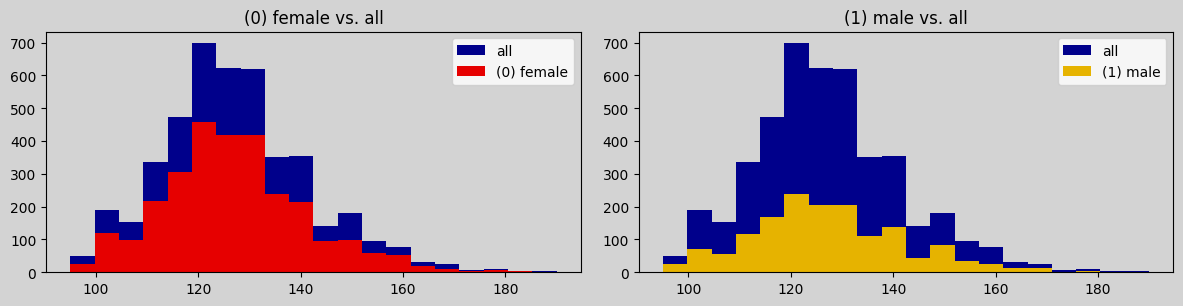

| Admission grade                  |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    95.000 |   190.000 |   126.978 |    14.482 |     0.531 |     0.663 |
| (0) female                       |    95.000 |   190.000 |   126.889 |    14.102 |     0.564 |     0.843 |
| (1) male                         |    95.000 |   190.000 |   127.142 |    15.161 |     0.475 |     0.375 |

===== Displaced =====


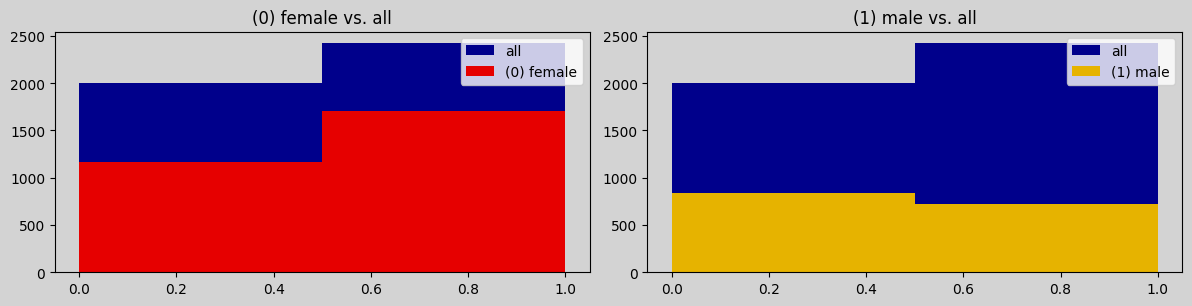

| Displaced ↓ / Target → |       (0) female |         (1) male |            Total |
| ---------------------- | ---------------- | ---------------- | ---------------- |
| (0) no                 |             1163 |              835 |             1998 |
| (1) yes                |             1705 |              721 |             2426 |

===== Educational special needs =====


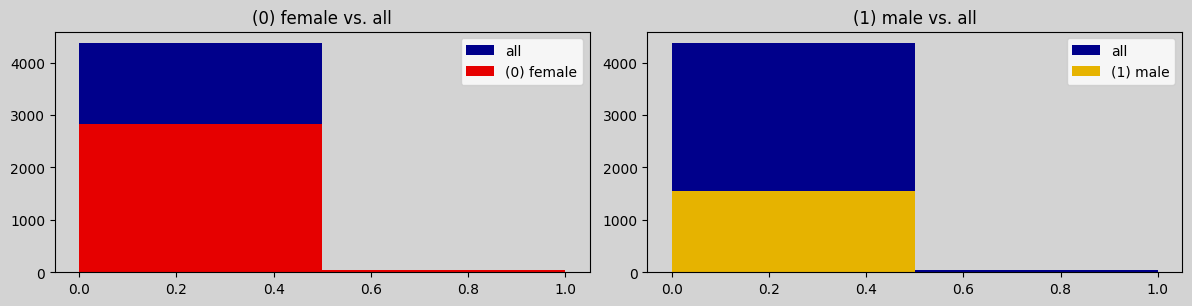

| Educational special needs ↓ / Target → |       (0) female |         (1) male |            Total |
| -------------------------------------- | ---------------- | ---------------- | ---------------- |
| (0) no                                 |             2831 |             1542 |             4373 |
| (1) yes                                |               37 |               14 |               51 |

===== Debtor =====


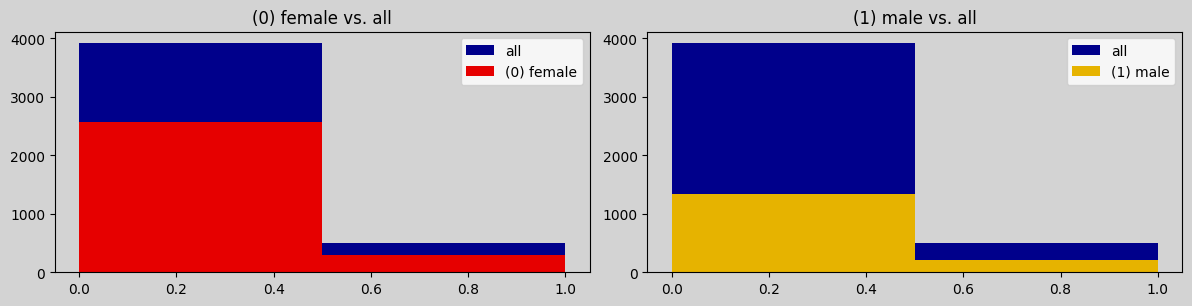

| Debtor ↓ / Target → |       (0) female |         (1) male |            Total |
| ------------------- | ---------------- | ---------------- | ---------------- |
| (0) no              |             2578 |             1343 |             3921 |
| (1) yes             |              290 |              213 |              503 |

===== Tuition fees up to date =====


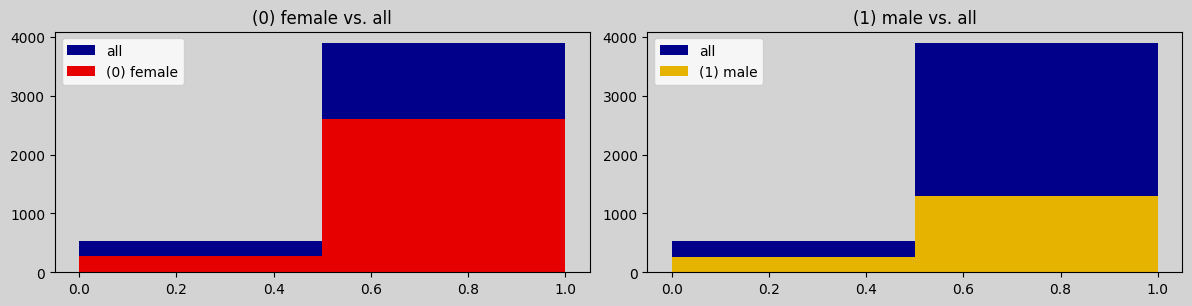

| Tuition fees up to date ↓ / Target → |       (0) female |         (1) male |            Total |
| ------------------------------------ | ---------------- | ---------------- | ---------------- |
| (0) no                               |              271 |              257 |              528 |
| (1) yes                              |             2597 |             1299 |             3896 |

===== Scholarship holder =====


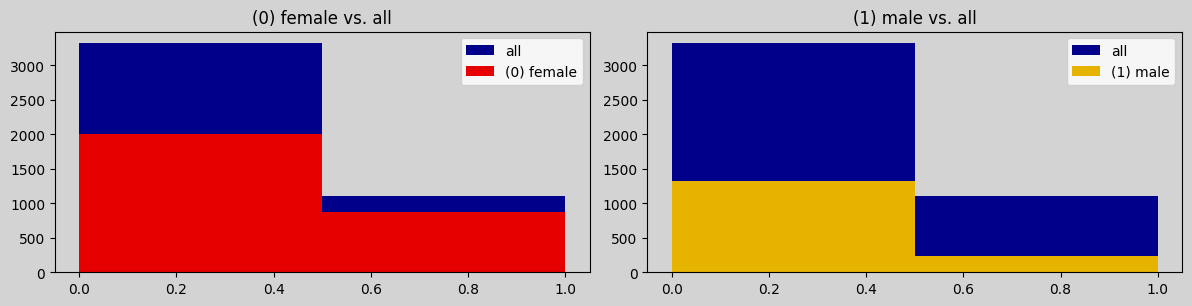

| Scholarship holder ↓ / Target → |       (0) female |         (1) male |            Total |
| ------------------------------- | ---------------- | ---------------- | ---------------- |
| (0) no                          |             2001 |             1324 |             3325 |
| (1) yes                         |              867 |              232 |             1099 |

===== Age at enrollment =====
(Age) Age of studend at enrollment


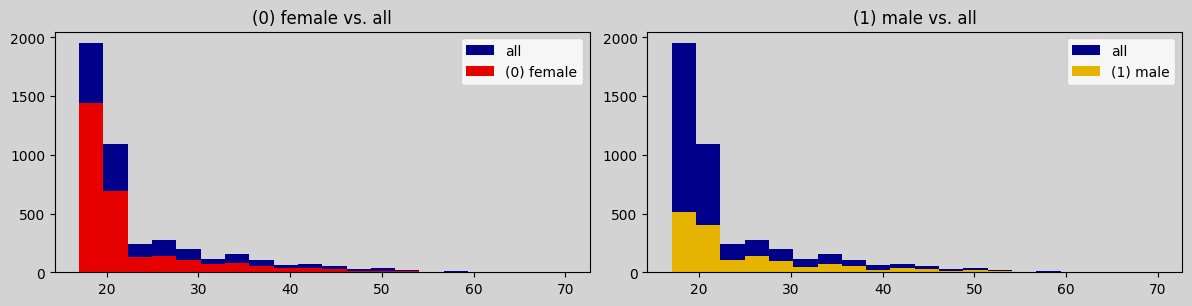

| Age at enrollment                |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    17.000 |    70.000 |    23.265 |     7.588 |     2.055 |     4.127 |
| (0) female                       |    17.000 |    62.000 |    22.433 |     6.986 |     2.308 |     5.385 |
| (1) male                         |    17.000 |    70.000 |    24.798 |     8.375 |     1.707 |     2.640 |

===== International =====


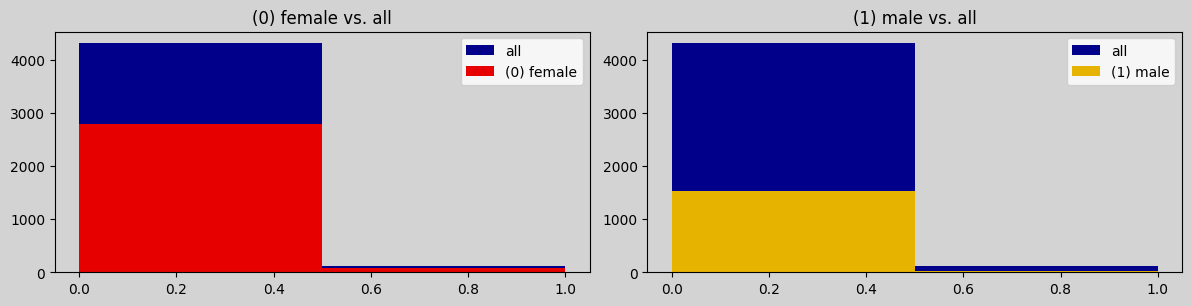

| International ↓ / Target → |       (0) female |         (1) male |            Total |
| -------------------------- | ---------------- | ---------------- | ---------------- |
| (0) no                     |             2788 |             1526 |             4314 |
| (1) yes                    |               80 |               30 |              110 |

===== Curricular units 1st sem (credited) =====
Number of curricular units credited in the 1st semester


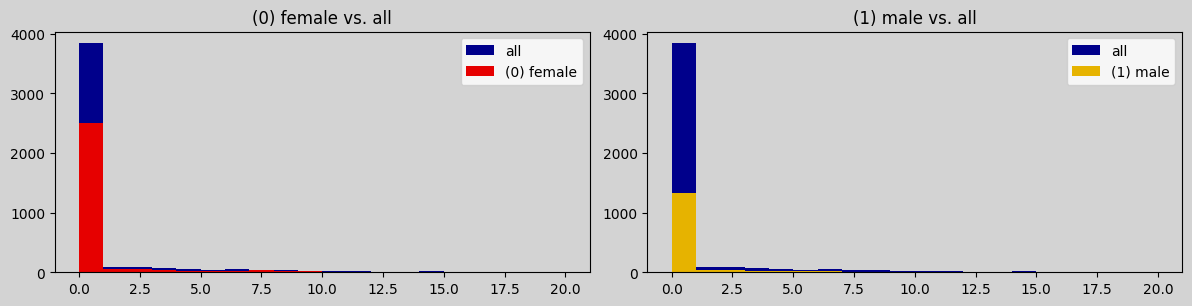

| C. u. 1st sem (credited)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    20.000 |     0.710 |     2.361 |     4.169 |    19.206 |
| (0) female                       |     0.000 |    20.000 |     0.680 |     2.300 |     4.171 |    19.117 |
| (1) male                         |     0.000 |    19.000 |     0.765 |     2.468 |     4.147 |    19.100 |

===== Curricular units 1st sem (enrolled) =====
Number of curricular units enrolled in the 1st semester


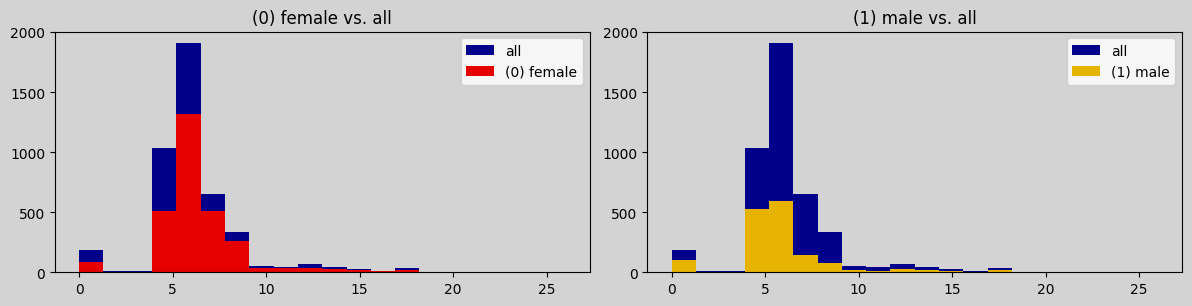

| C. u. 1st sem (enrolled)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    26.000 |     6.271 |     2.480 |     1.619 |     8.938 |
| (0) female                       |     0.000 |    26.000 |     6.445 |     2.308 |     1.869 |    10.785 |
| (1) male                         |     0.000 |    23.000 |     5.950 |     2.741 |     1.458 |     7.052 |

===== Curricular units 1st sem (evaluations) =====
Number of evaluations to curricular units in the 1st semester


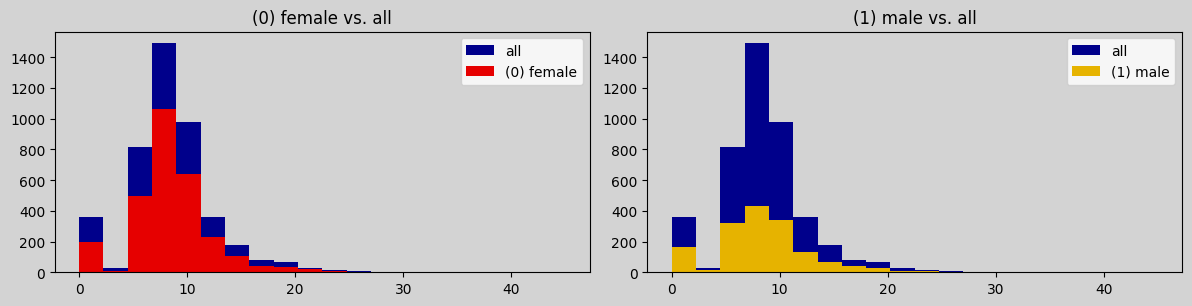

| C. u. 1st sem (evaluations)      |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    45.000 |     8.299 |     4.179 |     0.977 |     5.463 |
| (0) female                       |     0.000 |    45.000 |     8.365 |     3.935 |     0.986 |     5.728 |
| (1) male                         |     0.000 |    45.000 |     8.178 |     4.593 |     0.971 |     4.875 |

===== Curricular units 1st sem (approved) =====
Number of curricular units approved in the 1st semester


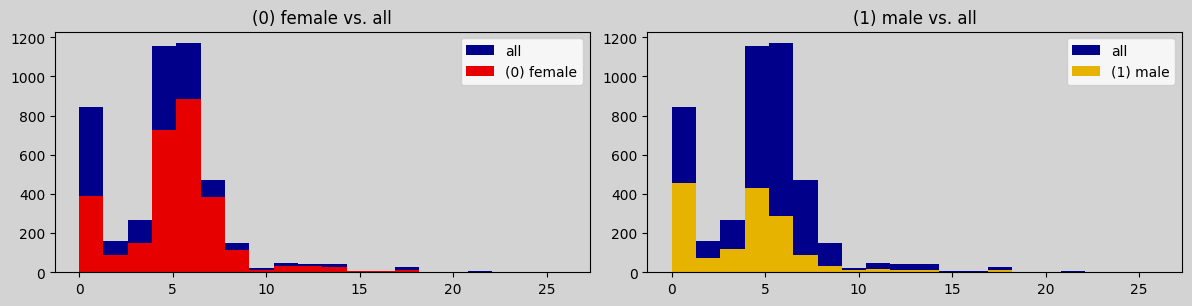

| C. u. 1st sem (approved)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    26.000 |     4.707 |     3.094 |     0.766 |     3.097 |
| (0) female                       |     0.000 |    26.000 |     5.126 |     2.881 |     0.682 |     3.903 |
| (1) male                         |     0.000 |    21.000 |     3.934 |     3.318 |     1.126 |     3.067 |

===== Curricular units 1st sem (grade) =====
Grade average in the 1st semester (between 0 and 20)


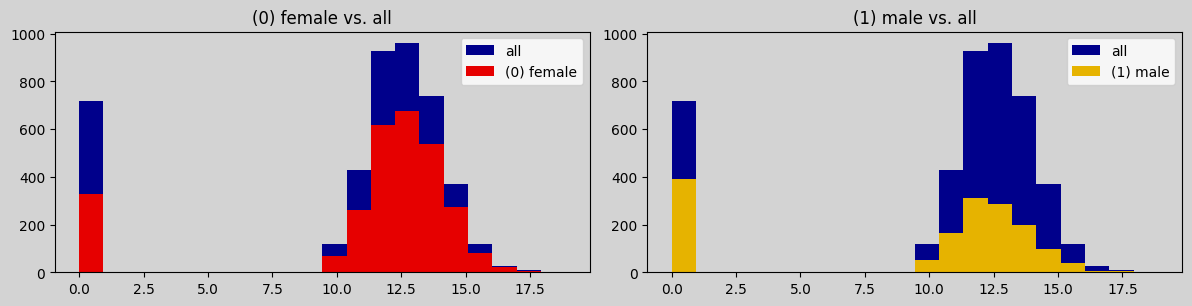

| Curricular units 1st sem (grade) |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    18.875 |    10.641 |     4.844 |    -1.568 |     0.908 |
| (0) female                       |     0.000 |    17.125 |    11.317 |     4.244 |    -2.033 |     2.879 |
| (1) male                         |     0.000 |    18.875 |     9.395 |     5.579 |    -0.980 |    -0.782 |

===== Curricular units 1st sem (without evaluations) =====
Number of curricular units without evalutions in the 1st semester


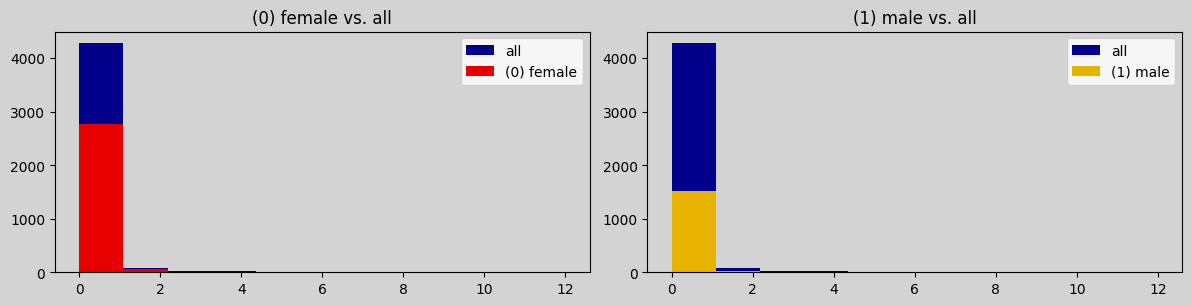

| C. u. 1st sem ...t evaluations)  |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    12.000 |     0.138 |     0.691 |     8.207 |    89.863 |
| (0) female                       |     0.000 |    12.000 |     0.141 |     0.686 |     7.948 |    84.911 |
| (1) male                         |     0.000 |    12.000 |     0.132 |     0.699 |     8.667 |    98.634 |

===== Curricular units 2nd sem (credited) =====
Number of curricular units credited in the 2nd semester


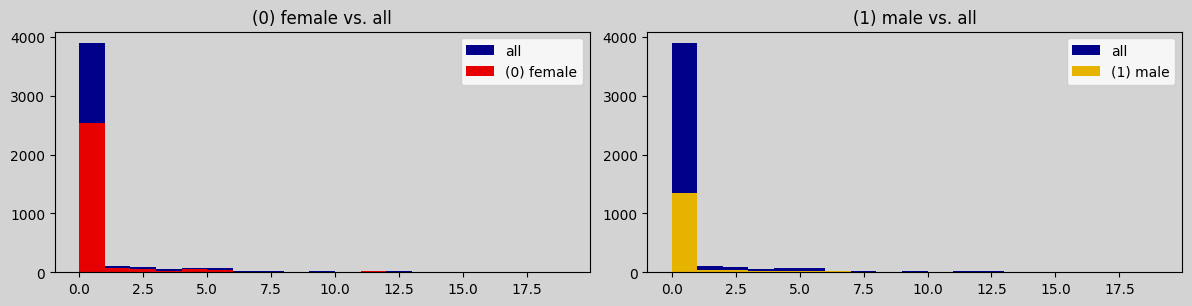

| C. u. 2nd sem (credited)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    19.000 |     0.542 |     1.919 |     4.635 |    24.427 |
| (0) female                       |     0.000 |    19.000 |     0.515 |     1.895 |     4.857 |    26.856 |
| (1) male                         |     0.000 |    18.000 |     0.591 |     1.960 |     4.265 |    20.567 |

===== Curricular units 2nd sem (enrolled) =====
Number of curricular units enrolled in the 2nd semester


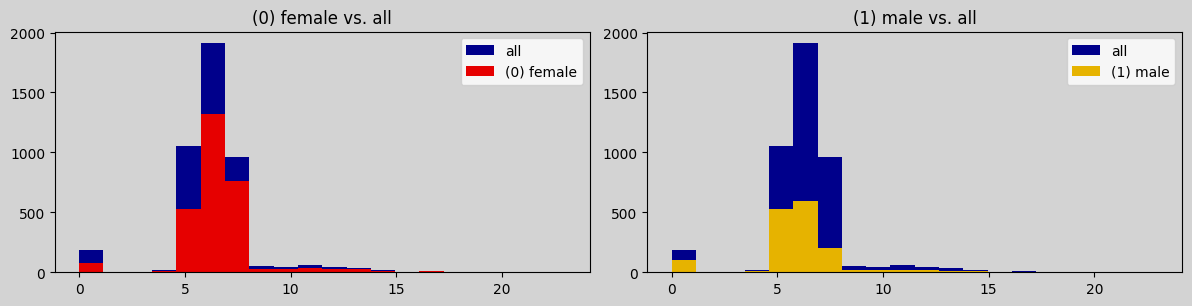

| C. u. 2nd sem (enrolled)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    23.000 |     6.232 |     2.196 |     0.788 |     7.135 |
| (0) female                       |     0.000 |    23.000 |     6.433 |     2.043 |     0.995 |     8.493 |
| (1) male                         |     0.000 |    23.000 |     5.862 |     2.410 |     0.711 |     5.817 |

===== Curricular units 2nd sem (evaluations) =====
Number of evaluations to curricular units in the 2nd semester


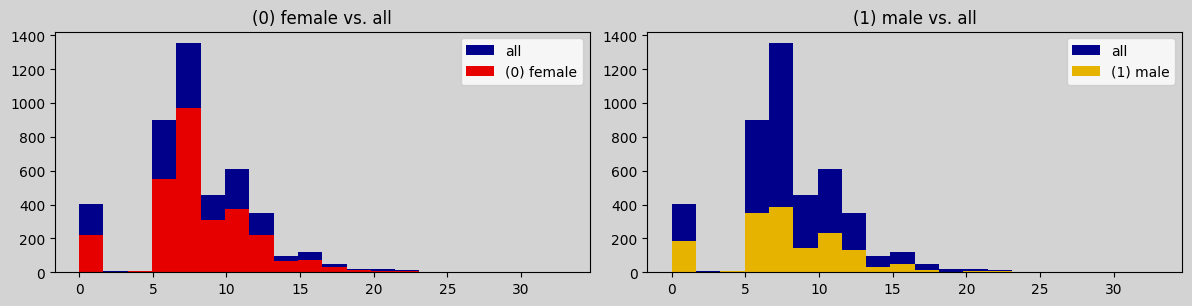

| C. u. 2nd sem (evaluations)      |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    33.000 |     8.063 |     3.948 |     0.336 |     2.068 |
| (0) female                       |     0.000 |    33.000 |     8.185 |     3.770 |     0.399 |     2.607 |
| (1) male                         |     0.000 |    28.000 |     7.839 |     4.249 |     0.288 |     1.328 |

===== Curricular units 2nd sem (approved) =====
Number of curricular units approved in the 2nd semester


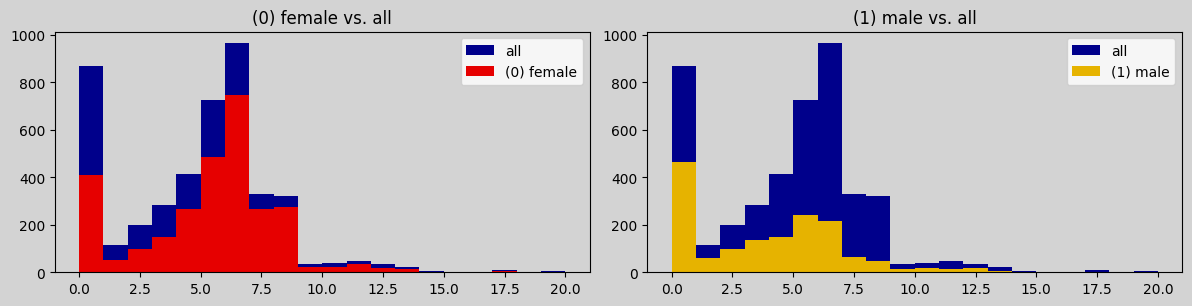

| C. u. 2nd sem (approved)         |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    20.000 |     4.436 |     3.015 |     0.306 |     0.845 |
| (0) female                       |     0.000 |    20.000 |     4.934 |     2.836 |     0.114 |     1.321 |
| (1) male                         |     0.000 |    20.000 |     3.518 |     3.118 |     0.800 |     1.193 |

===== Curricular units 2nd sem (grade) =====
Grade average in the 2nd semester (between 0 and 20)


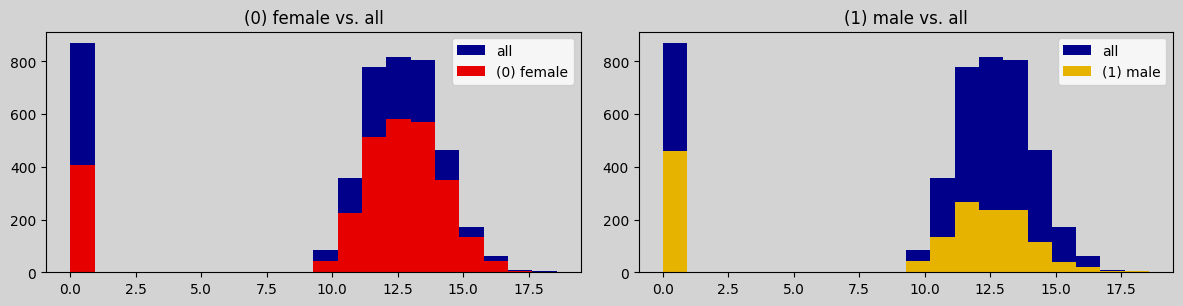

| Curricular units 2nd sem (grade) |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    18.571 |    10.230 |     5.211 |    -1.314 |     0.067 |
| (0) female                       |     0.000 |    17.587 |    10.994 |     4.650 |    -1.740 |     1.567 |
| (1) male                         |     0.000 |    18.571 |     8.822 |     5.857 |    -0.751 |    -1.233 |

===== Curricular units 2nd sem (without evaluations) =====
Number of curricular units without evalutions in the 1st semester


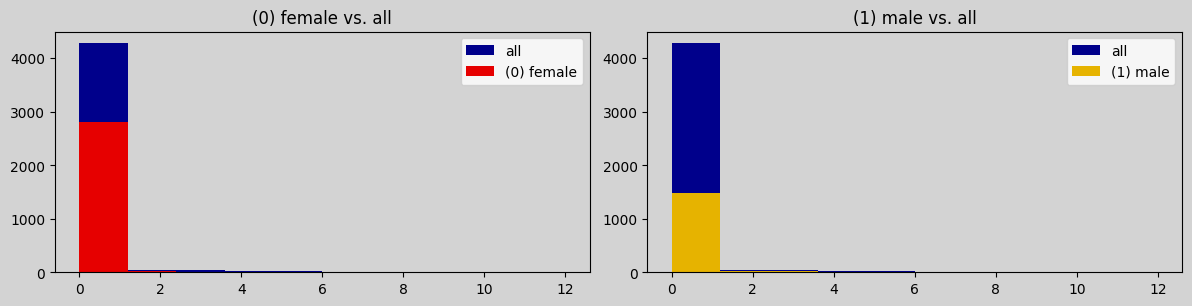

| C. u. 2nd sem ...t evaluations)  |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     0.000 |    12.000 |     0.150 |     0.754 |     7.268 |    66.812 |
| (0) female                       |     0.000 |    12.000 |     0.119 |     0.676 |     8.331 |    86.720 |
| (1) male                         |     0.000 |    12.000 |     0.209 |     0.877 |     6.026 |    46.620 |

===== Unemployment rate =====
Unemployment rate (%)


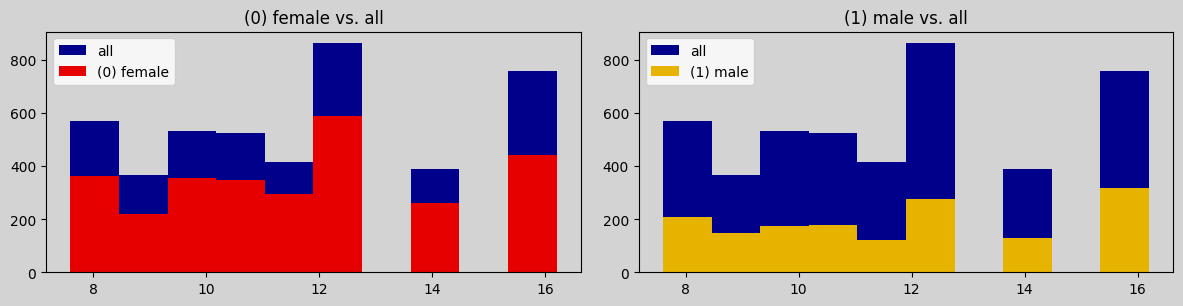

| Unemployment rate                |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |     7.600 |    16.200 |    11.566 |     2.664 |     0.212 |    -0.996 |
| (0) female                       |     7.600 |    16.200 |    11.523 |     2.591 |     0.216 |    -0.911 |
| (1) male                         |     7.600 |    16.200 |    11.646 |     2.792 |     0.194 |    -1.141 |

===== Inflation rate =====
Inflation rate (%)


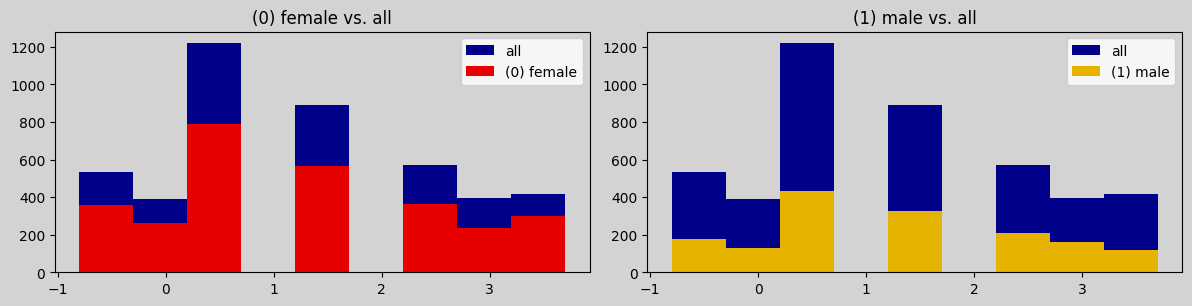

| Inflation rate                   |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    -0.800 |     3.700 |     1.228 |     1.383 |     0.252 |    -1.039 |
| (0) female                       |    -0.800 |     3.700 |     1.224 |     1.401 |     0.275 |    -1.039 |
| (1) male                         |    -0.800 |     3.700 |     1.235 |     1.349 |     0.208 |    -1.045 |

===== GDP =====


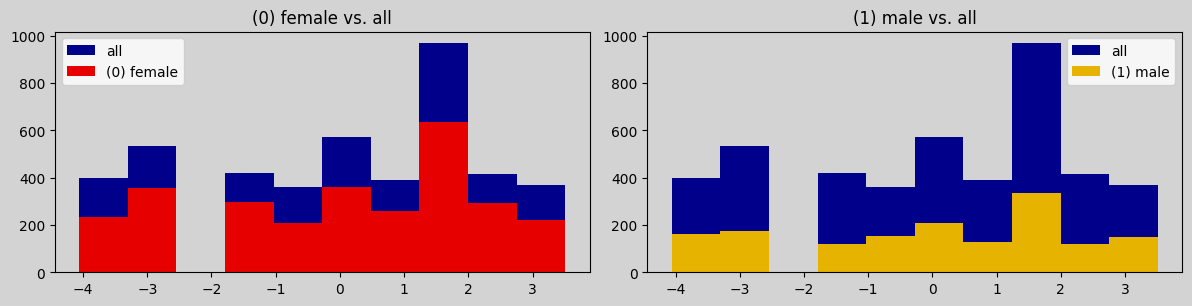

| GDP                              |       Min |       Max |      Mean |       Var |  Skewness |  Kurtosis |
| -------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- |
| All                              |    -4.060 |     3.510 |     0.002 |     2.270 |    -0.394 |    -1.002 |
| (0) female                       |    -4.060 |     3.510 |     0.016 |     2.245 |    -0.408 |    -1.004 |
| (1) male                         |    -4.060 |     3.510 |    -0.023 |     2.315 |    -0.368 |    -1.002 |

===== Target =====
Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course


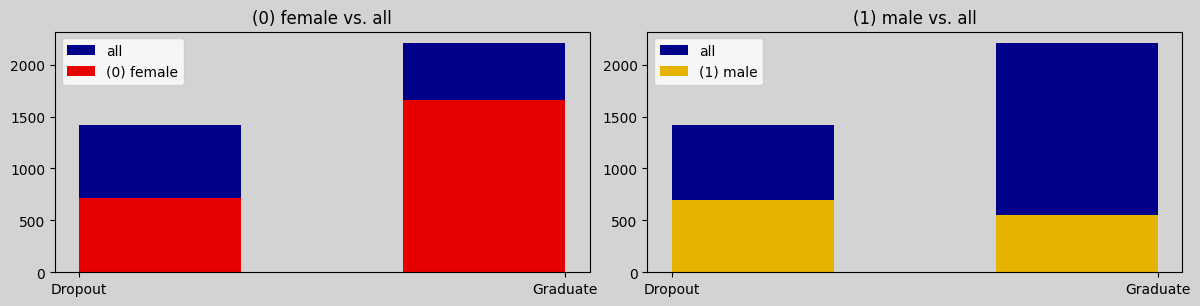

| Target ↓ / Target → |       (0) female |         (1) male |            Total |
| ------------------- | ---------------- | ---------------- | ---------------- |
| Dropout             |              720 |              701 |             1421 |
| Enrolled            |              487 |              307 |              794 |
| Graduate            |             1661 |              548 |             2209 |

===== Course =====


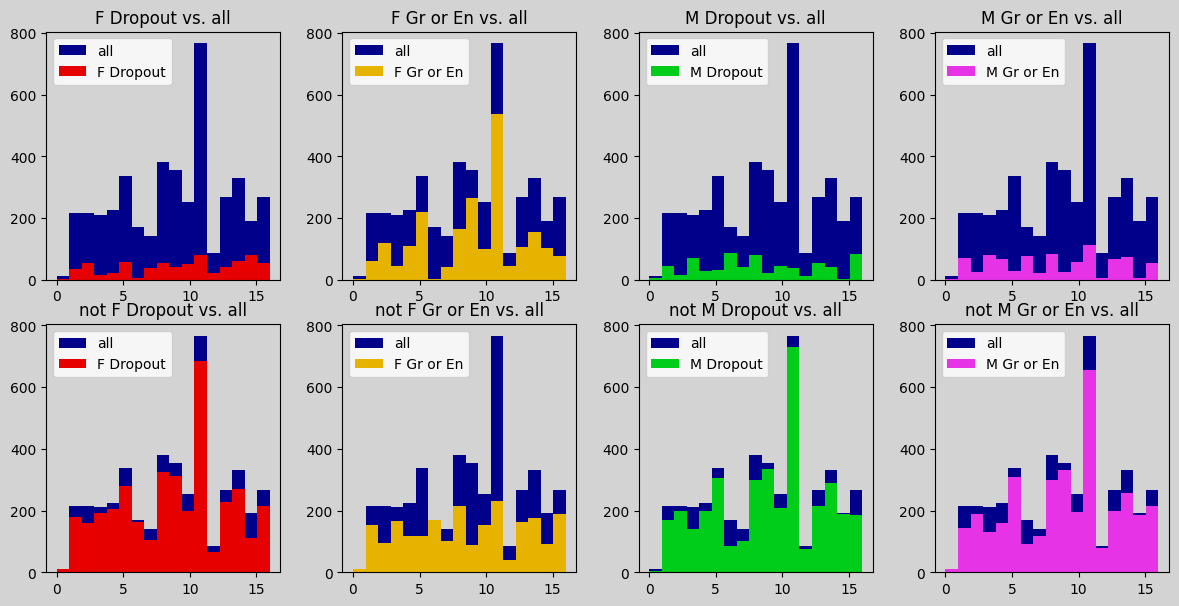

| Course ↓ / Target →                         |        F Dropout |       F Gr or En |        M Dropout |       M Gr or En |            Total |
| ------------------------------------------- | ---------------- | ---------------- | ---------------- | ---------------- | ---------------- |
| (33) Biofuel Production Technologies        |                1 |                2 |                7 |                2 |               12 |
| (171) Animation and Multimedia Design       |               36 |               62 |               46 |               71 |              215 |
| (8014) Social Service (evening attendance)  |               54 |              119 |               17 |               25 |              215 |
| (9003) Agronomy                             |               17 |               44 |               69 |               80 |              210 |
| (9070) Communication Design                 |               22 |              108 |               29 |               67 |              226 |

In [53]:
def gen_histograms_and_tables_for_gender(data):
    d = data.copy()
    d["Gender"] = d["Gender"].apply(lambda v: features["Gender"][1][v])
    gen_histograms_and_tables(d, d.columns, "Gender", {"Gender", "Target_num"})

    d = data.copy()
    d["Gender_with_Target"] = ""
    d.loc[(d["Gender"] == 0) & (d["Target"] == "Dropout"), "Gender_with_Target"] = "F Dropout"
    d.loc[(d["Gender"] == 1) & (d["Target"] == "Dropout"), "Gender_with_Target"] = "M Dropout"
    d.loc[(d["Gender"] == 0) & (d["Target"] != "Dropout"), "Gender_with_Target"] = "F Gr or En"
    d.loc[(d["Gender"] == 1) & (d["Target"] != "Dropout"), "Gender_with_Target"] = "M Gr or En"
    gen_histograms_and_tables(d, ["Course"], "Gender_with_Target", {})


gen_histograms_and_tables_for_gender(data)

Correlations
------------

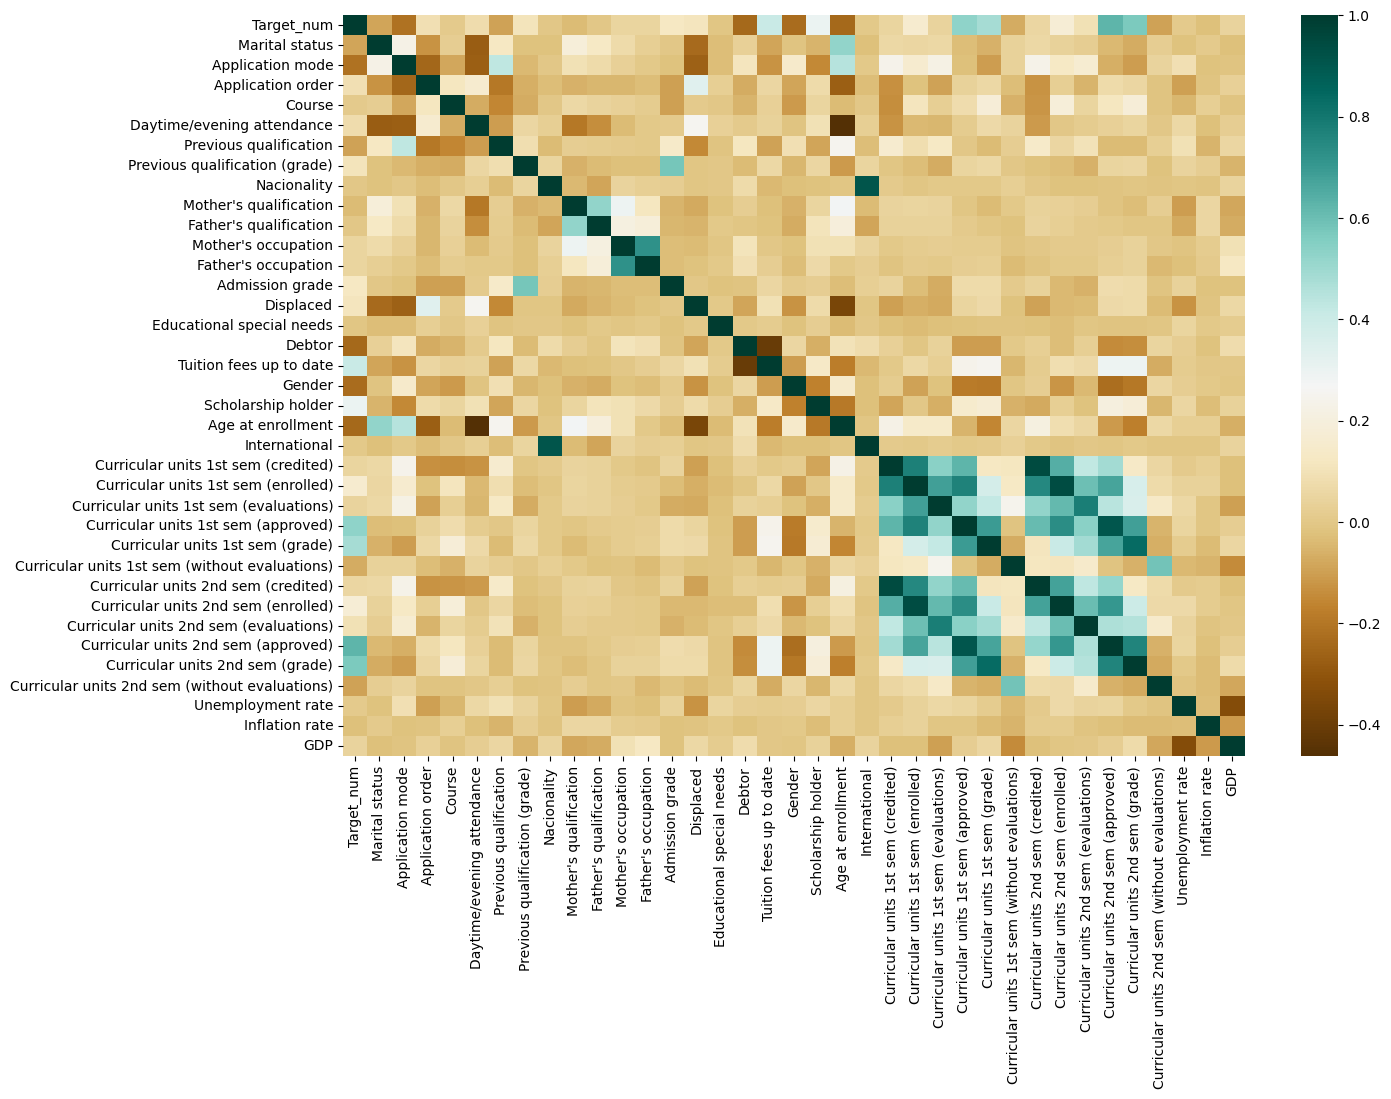

In [55]:
def show_corr_mtx(data):
    plt_layout(1, 1, (12, 8))
    
    # Reorder features in order to bring the target column closer to the labels
    cols = ["Target_num"] + [col for col in data.columns if col not in targets]

    corr = data[cols].corr()
    sns.heatmap(corr, cmap="BrBG", annot=False)
    plt.show()


show_corr_mtx(data)

Models
======

Evaluation framework
--------------------

In [53]:
# TODO

Results
=======

TODO